# Anomaly Detection of Retail Store Sales

This hands-on mini-project will enable you to reinforce your learnings pertaining to anomaly detection in this unit. By now, you must already be aware of the key objective of anomaly detection. Just to refresh your memory, anomaly detection is the identification of outliers or rare event items in a dataset which potentially exhibit abnormal behavior or properties as compared to the rest of the datapoints.

There are a wide variety of anomaly detection methods including supervised, unsupervised and semi-supervised. Typically you can perform anomaly detection on univariate data, multivariate data as well as data which is temporal in nature. In this mini-project you will leverage state-of-the-art anomaly detection models from frameworks like [__`scikit-learn`__](https://scikit-learn.org/stable/modules/outlier_detection.html) and [__`PyOD`__](https://pyod.readthedocs.io/en/latest/index.html).


By the end of this mini-project, you will have successfully applied these techniques to find out potential outliers pertaining to sales transactional data in a retail store dataset and also learnt how to visualize outliers similar to the following plot.

![](outlier_ex.png)

We will be performing anomaly detection on both univariate and multivariate data and leverage the following anomaly detection techniques.

- Simple Statistical Models (mean & standard deviation: the three-sigma rule)
- Isolation Forest
- Clustering-Based Local Outlier Factor
- Auto-encoders

# 1. Getting and Loading the Dataset

The first step towards solving any data science or machine learning problem is to obtain the necessary data. In this scenario, we will be dealing with a popular retail dataset known as the [SuperStore Sales Dataset](https://community.tableau.com/docs/DOC-1236) which consists of transactional data pertaining to a retail store.

#### Please download the required dataset from [here](https://community.tableau.com/docs/DOC-1236) if necessary, although it will also be provided to you along with this notebook for this mini-project

Once we have the necessary data, we will load up the dataset and perform some initial exploratory data analysis

# 2. Exploratory Data Analysis

It's time to do some basic exploratory analysis on the retail store transactional data. We start by loading up the dataset into a pandas dataframe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


df = pd.read_excel("./Superstore.xls")
df.info()
list_cols = ['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We don't have any major missing values in our dataset and we can now look at a sample subset of the data

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Visualize Sales vs. Order Date 

Let's look more closely at the __`Sales`__ attribute of the dataset in the next few cells. We'll start by looking at typical sales over time 

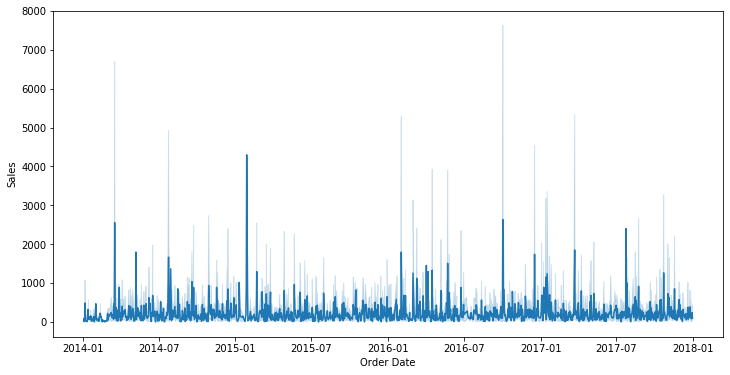

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=df['Order Date'], y=df['Sales']);

## Visualize Sales Distribution


Let's now look at the data distribution for __`Sales`__

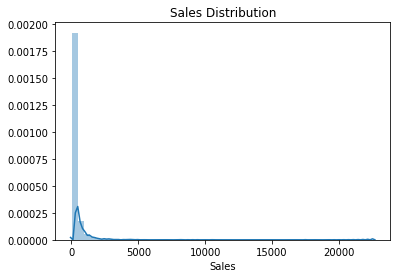

In [ ]:
sns.distplot(df['Sales'])
plt.title("Sales Distribution");

In [ ]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

We can definitely see the presence of potential outliers in terms of the min or max values as compared to the meat of the distribution in the interquartile range as observed in the distribution statistics

## Q 2.1: Visualize Profit vs. Order Date 

Let's now look closely at the __`Profit`__ attribute of the dataset in the next few cells. We'll start by looking at typical profits over time.

__Your turn: Plot `Order Date` vs. `Profit` using a line plot__

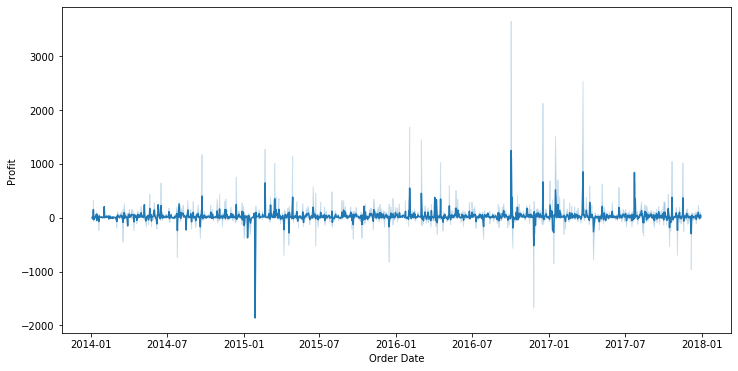

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=df['Order Date'], y=df['Profit']);

## Q 2.2: Visualize Profit Distribution

Let's now look at the data distribution for __`Profit`__

__Your turn: Plot the distribution for `Profit`__

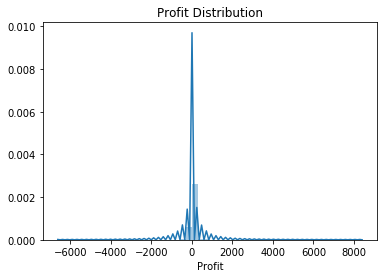

In [ ]:
sns.distplot(df['Profit'])
plt.title("Profit Distribution");

__Your turn: Get the essential descriptive statistics for `Profit` using an appropriate function__

In [ ]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

__Your turn: Do you notice anything interesting about the distribution?__

We have both positive and negative values in profits since it indicates either a profit or a loss based on the sales and original price of the items.

## Visualize Discount vs. Profit

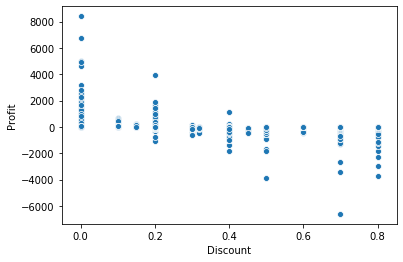

In [ ]:
sns.scatterplot(x="Discount", y="Profit", data=df);

In the above visual, we look at a scatter plot showing the distribution of profits w.r.t discounts given

# 3. Univariate Anomaly Detection

Univariate is basically analysis done on a single attribute or feature. In this section, we will perform anomaly detection on a single attribute using the following methods.

- Statistical Process Control Methods (mean + 3sigma thresholding)
- Isolation Forest

We will start off by demonstrating both these techniques on the __`Sales`__ attribute and later on, you will implement similar techniques on the __`Profit`__ attribute.

## 3.1: Univariate Anomaly Detection on Sales using Statistical Modeling

Here we start off by implementing anomaly detecting using statistical modeling on the __`Sales`__ attribute

### Obtain Upper Limit Threshold for Sales

Here we are concerned about transactions with high sales values so we compute the upper limit using the $\mu$ + 3$\sigma$ rule where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation of the distribution.

In [ ]:
mean_sales = df['Sales'].mean()
sigma_sales = df['Sales'].std()
three_sigma_sales = 3*sigma_sales

threshold_sales_value = mean_sales + three_sigma_sales
print('Threshold Sales:', threshold_sales_value)

Threshold Sales: 2099.5933023565394


### Visualize Outlier Region

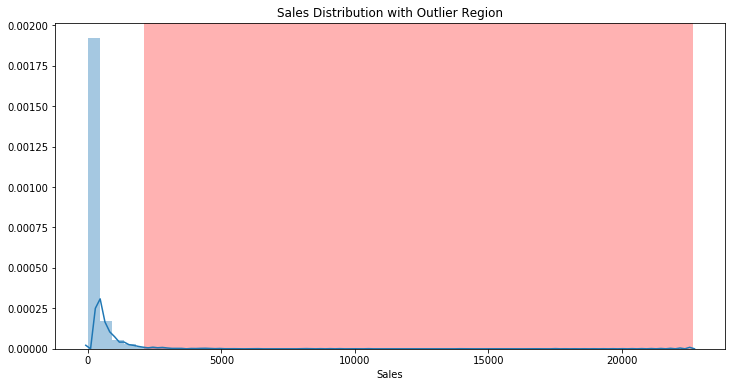

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df['Sales'])
plt.axvspan(threshold_sales_value, df['Sales'].max(), facecolor='r', alpha=0.3)
plt.title("Sales Distribution with Outlier Region");

### Filter and Sort Outliers

Here we filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
sales_outliers_df = df['Sales'][df['Sales'] > threshold_sales_value]
print('Total Sales Outliers:', len(sales_outliers_df))
sales_outliers_sorted = sales_outliers_df.sort_values(ascending=False)
sales_outliers_sorted.head(5)

Total Sales Outliers: 127


2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
Name: Sales, dtype: float64

### View Top 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,Philadelphia,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


### View Bottom 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5300,Springfield,Furniture,Tables,Hon Rectangular Conference Tables,2275.500,10,0.0,386.8350
6101,New York City,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,2254.410,5,0.1,375.7350
4881,Henderson,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793
7487,Dover,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793
1155,Harrisonburg,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",2244.480,7,0.0,493.7856
8699,Nashville,Technology,Phones,Samsung Galaxy S III - 16GB - pebble blue (T-M...,2239.936,8,0.2,223.9936
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
8424,Lakewood,Furniture,Bookcases,"Global Adaptabilites Bookcase, Cherry/Storm Gr...",2154.900,5,0.0,129.2940
6534,Buffalo,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,2152.776,3,0.2,726.5619
8680,Richmond,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2104.550,7,0.0,694.5015


## Q 3.2: Univariate Anomaly Detection on Profit using Statistical Modeling

In this section you will use the learning from Section 3.1 and implement anomaly detecting using statistical modeling on the __`Profit`__ attribute. Since we have both +ve (profits) and -ve (losses) values in the distribution, we will try to find anomalies for each.

### Obtain Upper Limit Threshold for Profit

__Your turn:__ Compute the upper and lower limits using the  𝜇  + 3 𝜎  rule where  𝜇  is the mean of the distribution and  𝜎  is the standard deviation of the distribution.

In [ ]:
mean_profit = df['Profit'].mean()
sigma_profit = df['Profit'].std()
three_sigma_profit = 3*sigma_profit


threshold_profit_upper_limit = mean_profit + 3*sigma_profit
threshold_profit_lower_limit = mean_profit - 3*sigma_profit

print('Thresholds Profit:', threshold_profit_lower_limit, threshold_profit_upper_limit)

Thresholds Profit: -674.123426765088 731.4372193806576


### Visualize Outlier Regions

__Your turn:__ Visualize the upper and lower outlier regions in the distribution similar to what you did in 3.1

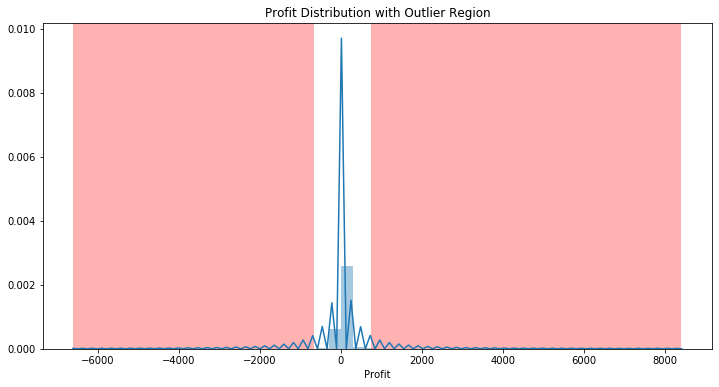

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df['Profit'])
plt.axvspan(threshold_profit_upper_limit, df['Profit'].max(), facecolor='r', alpha=0.3)
plt.axvspan(threshold_profit_lower_limit, df['Profit'].min(), facecolor='r', alpha=0.3)
plt.title("Profit Distribution with Outlier Region");

### Filter and Sort Outliers

__Your turn:__ Filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
outliers_df = df['Profit'][df['Profit'] > threshold_sales_value]
print('Total Profit Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(ascending=False)
outliers_sorted.head(5)

Total Profit Outliers: 15


6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

### View Top 10 Outlier Transactions

__Your turn:__ View the top ten transactions based on highest profits

In [ ]:
(df.loc[outliers_sorted.index.tolist()][list_cols]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
509,Atlanta,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
7666,Providence,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568
6520,Jackson,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216


### Q: Do you notice any interesting insights based on these transactions?

__A:__ Most of these are purchases for Copiers and Binders , looks like Canon products yielded some good profits`

### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions based on lowest profits (highest losses)

In [ ]:
(df.loc[outliers_sorted.index.tolist()][list_cols]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
509,Atlanta,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
7666,Providence,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568
6520,Jackson,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216
1085,Yonkers,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,0.0,2400.9657
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8990,Springfield,Technology,Copiers,Canon PC1060 Personal Laser Copier,4899.930,7,0.0,2302.9671
6626,New York City,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,6999.960,4,0.0,2239.9872
8204,New York City,Technology,Machines,Zebra ZM400 Thermal Label Printer,4643.800,4,0.0,2229.0240


### Q: Do you notice any interesting insights based on these transactions?

__A:__ Most of these are purchases for Machines and Binders , looks like Cibify 3D Printers yielded high losses

## 3.3: Univariate Anomaly Detection on Sales using Isolation Forest

You might have already learnt about this model from the curriculum. Just to briefly recap, the Isolation Forest model,  'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Recursive partitioning can be represented by a tree structure. Hence, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

More details are available in this [User Guide](https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest)

### Initialize and Train Model

Here we initialize the isolation forest model with some hyperparameters assuming the proportion of outliers to be 1% of the total data (using the `contamination` setting)

In [ ]:
from sklearn.ensemble import IsolationForest

sales_ifmodel = IsolationForest(n_estimators=100,
                                contamination=0.01)
sales_ifmodel.fit(df[['Sales']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

### Visualize Outlier Region

Here we visualize the outlier region in the data distribution

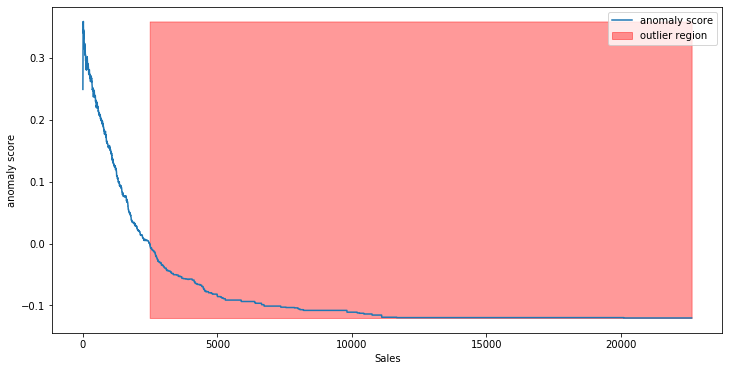

In [ ]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = sales_ifmodel.decision_function(xx)
outlier = sales_ifmodel.predict(xx)
plt.figure(figsize=(12, 6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales');

### Filter and Sort Outliers

Here we predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
outlier_predictions = sales_ifmodel.predict(df[['Sales']])

sales_outliers_df = df[['Sales']]
sales_outliers_df['Outlier'] = outlier_predictions
sales_outliers_df = sales_outliers_df[sales_outliers_df['Outlier'] == -1]['Sales']

print('Total Sales Outliers:', len(sales_outliers_df))
sales_outliers_sorted = sales_outliers_df.sort_values(ascending=False)
sales_outliers_sorted.head(5)

Total Sales Outliers: 100


2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
Name: Sales, dtype: float64

### View Top 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,Philadelphia,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


### View Bottom 10 Outlier Transactions

In [ ]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1805,Los Angeles,Technology,Phones,Samsung Galaxy Note 2,2575.944,7,0.2,257.5944
7474,Henderson,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
6884,Minneapolis,Furniture,Chairs,Hon Pagoda Stacking Chairs,2567.840,8,0.0,770.3520
8271,New York City,Furniture,Chairs,Hon 4700 Series Mobuis Mid-Back Task Chairs wi...,2563.056,8,0.1,313.2624
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
6010,Los Angeles,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2548.560,6,0.2,286.7130
7280,Columbia,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2541.980,2,0.0,1270.9900
263,Houston,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,7,0.4,-251.9958
7937,Brentwood,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,2518.290,9,0.0,654.7554
3443,New York City,Office Supplies,Appliances,Hoover Shoulder Vac Commercial Portable Vacuum,2504.740,7,0.0,626.1850


## Q 3.4: Univariate Anomaly Detection on Profit using Isolation Forest

In this section you will use the learning from Section 3.3 and implement anomaly detecting using isolation on the __`Profit`__ attribute. Since we have both +ve (profits) and -ve (losses) values in the distribution, we will try to find anomalies for each.

### Initialize and Train Model

__Your Turn:__ Initialize the isolation forest model with similar hyperparameters as Section 3.3 and also assuming the proportion of outliers to be 1% of the total data (using the contamination setting)

In [ ]:
profit_ifmodel = IsolationForest(n_estimators=100,
                                contamination=0.01)
profit_ifmodel.fit(df[['Profit']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

### Visualize Outlier Regions

__Your turn:__ Visualize the upper and lower outlier regions in the distribution similar to what you did in 3.3

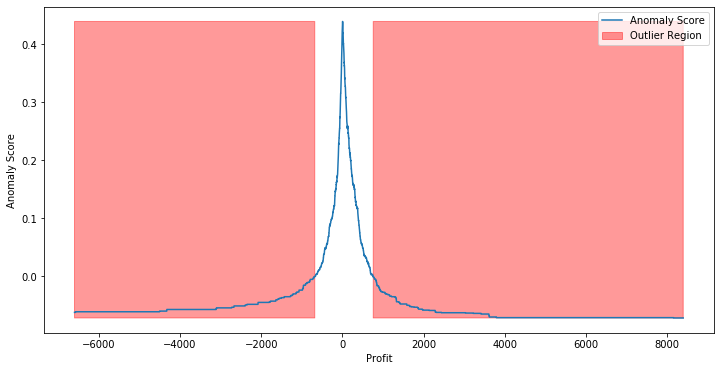

In [ ]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = profit_ifmodel.decision_function(xx)
outlier = profit_ifmodel.predict(xx)
plt.figure(figsize=(12, 6))
plt.plot(xx, anomaly_score, label='Anomaly Score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='Outlier Region')
plt.legend()
plt.ylabel('Anomaly Score')
plt.xlabel('Profit');

### Filter and Sort Outliers

__Your Turn:__ Predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values similar to 3.3

In [ ]:
outlier_predictions = profit_ifmodel.predict(df[['Profit']])

outliers_df = df[['Profit']]
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == -1]['Profit']

print('Total Sales Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(ascending=False)
outliers_sorted.head(5)

Total Sales Outliers: 98


6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

### View Top 10 Outlier Transactions

__Your turn:__ View the top ten transactions based on highest profits

In [ ]:
(df.loc[outliers_sorted.index.tolist()][list_cols]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
509,Atlanta,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
7666,Providence,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568
6520,Jackson,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216


### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions based on lowest profits (highest losses)

In [ ]:
(df.loc[outliers_sorted.index.tolist()][list_cols]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


### Q: Do you observe any similarity in the results with the previous method?

__A:__ Yes

Another interesting approach to check out would be the [Generalized ESD Test for Outliers](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm)



# 4. Multivariate Anomaly Detection

Multivariate is basically analysis done on more than one attribute or feature at a time. In this section, we will perform anomaly detection on two attributes (__`Discount`__ & __`Profit`__) using the following methods.

- Clustering Based Local Outlier Factor (CBLOF)
- Isolation Forest
- Auto-Encoders

You will learn how to train these models to detect outliers and also visualize these outliers. For this section we will be using the __[`pyod`](https://pyod.readthedocs.io/en/latest/)__ package so make sure you have it installed.

In [ ]:
!pip install pyod

## Extract Subset Data for Outlier Detection

In [ ]:
cols = ['Discount', 'Profit']
subset_df = df[cols]
subset_df.head()

,Discount,Profit
0,0.00,41.9136
1,0.00,219.5820
2,0.00,6.8714
3,0.45,-383.0310
4,0.20,2.5164


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
subset_df[cols] = mms.fit_transform(subset_df)
subset_df.head()

,Discount,Profit
0,0.0000,0.442794
1,0.0000,0.454639
2,0.0000,0.440458
3,0.5625,0.414464
4,0.2500,0.440168


## 4.1: Multivariate Anomaly Detection with Clustering Based Local Outlier Factor (CBLOF)

The CBLOF model takes as an input the dataset and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta. The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster.

By default, kMeans is used for clustering algorithm. You can read more in the [official documentation](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)

### Initialize and Train Model

Here we initialize the CBLOF model with some hyperparameters assuming the proportion of outliers to be 1% of the total data (using the `contamination` setting)

In [ ]:
from pyod.models import cblof

cblof_model = cblof.CBLOF(contamination=0.01, random_state=42)
cblof_model.fit(subset_df)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=1, random_state=42,
   use_weights=False)

### Filter and Sort Outliers

Here we predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [ ]:
outlier_predictions = cblof_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

In [ ]:
(df.loc[outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
463,Phoenix,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1272.630,6,0.5,-814.4832
4128,Charlotte,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,2624.985,3,0.5,-944.9946
8993,Columbia,Furniture,Tables,Balt Solid Wood Round Tables,1875.258,7,0.4,-968.8833
5320,Knoxville,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,2314.116,7,0.4,-1002.7836
165,San Antonio,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
27,Philadelphia,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


We can definitely see some huge losses incurred based on giving higher discounts even if the sales amount was high which is interesting as well as concerning.

## Q 4.2: Multivariate Anomaly Detection with Isolation Forest

Here you will detect anomalies using the Isolation Forest model and use the learnings from 4.1. Here you will use the [`pyod`](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest) version of [Isolation Forest](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest) which is basically a wrapper over the `scikit-learn` version but with more functionalities.

### Initialize and Train Model

__Your Turn:__ Initialize the isolation forest model with similar hyperparameters as before and also assuming the proportion of outliers to be 1% of the total data (using the contamination setting)

In [ ]:
from pyod.models import iforest

if_model = iforest.IForest(contamination=0.01, random_state=42)
if_model.fit(subset_df)

IForest(behaviour='old', bootstrap=False, contamination=0.01,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

### Filter and Sort Outliers

__Your Turn:__ Predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values similar to 4.1

In [ ]:
outlier_predictions = if_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions 

In [ ]:
(df.loc[outliers_sorted.index.tolist()][list_cols]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


### Q: Do you notice any differences in the results with the previous model?

We do notice some transactions with 80% discount and high losses

## Q 4.3: Multivariate Anomaly Detection with Auto-encoders

Here you will detect anomalies using the Auto-encoder model and use the learnings from 4.1. Here you will use the [Auto-encoder](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.auto_encoder) model from `pyod` which is a deep learning model often used for learning useful data representations in an unsupervised fashion without any labeled data. 

![](outlier_ae.png)

Similar to PCA, AE could be used to detect outlier objects in the data by calculating the reconstruction errors

### Initialize Model

Here we initiaze an auto-encoder network with a few hidden layers so that we could train it for a 100 epochs

In [ ]:
from pyod.models import auto_encoder

ae_model = auto_encoder.AutoEncoder(hidden_neurons=[2, 32, 32, 2], 
                                    hidden_activation='relu',
                                    output_activation='sigmoid',
                                    epochs=100,
                                    batch_size=32,
                                    contamination=0.01)

Using TensorFlow backend.


### Train Model

__Your turn:__ Train the model by calling the `fit()` function on the right data

In [ ]:
ae_model.fit(subset_df)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

Train on 8994 samples, validate on 1000 samples
Epoch 1/100



  32/8994 [..............................] - ETA: 5:44 - loss: 6.5412

 928/8994 [==>...........................] - ETA: 11s - loss: 6.0658 

1184/8994 [==>...........................] - ETA: 8s - loss: 7.2082 

1824/8994 [=====>........................] - ETA: 5s - loss: 10.0788

2272/8994 [======>.......................] - ETA: 4s - loss: 9.1152 

2848/8994 [========>.....................] - ETA: 3s - loss: 8.7721

3424/8994 [==========>...................] - ETA: 2s - loss: 9.0755

4064/8994 [============>.................] - ETA: 2s - loss: 12.4101

4800/8994 [===============>..............] - ETA: 1s - loss: 11.3685

5344/8994 [================>.............] - ETA: 1s - loss: 10.7098

5824/8994 [==================>...........] - ETA: 1s - loss: 10.3936

6368/8994 [====================>.........] - ETA: 0s - loss: 9.8548 

6784/8994 [=====================>........] - ETA: 0s - loss: 9.6274

7232/8994 [=======================>......] - ETA: 0s - loss: 9.2788

7872/8994 [=========================>....] - ETA: 0s - loss: 8.7776

8608/8994 [===========================>..] - ETA: 0s - loss: 8.8554

8994/8994 [==============================] - 3s 320us/step - loss: 8.8297 - val_loss: 3.0759


Epoch 2/100
  32/8994 [..............................] - ETA: 0s - loss: 3.2085

 512/8994 [>.............................] - ETA: 1s - loss: 3.7224

1152/8994 [==>...........................] - ETA: 1s - loss: 3.6232

1824/8994 [=====>........................] - ETA: 1s - loss: 3.8907

2592/8994 [=======>......................] - ETA: 0s - loss: 3.7291

3200/8994 [=========>....................] - ETA: 0s - loss: 3.5145

4128/8994 [============>.................] - ETA: 0s - loss: 3.8515

4736/8994 [==============>...............] - ETA: 0s - loss: 4.3288

5632/8994 [=================>............] - ETA: 0s - loss: 6.9523

6176/8994 [===================>..........] - ETA: 0s - loss: 7.6004

6944/8994 [======================>.......] - ETA: 0s - loss: 7.5590

7584/8994 [========================>.....] - ETA: 0s - loss: 7.2864

8288/8994 [==========================>...] - ETA: 0s - loss: 6.8891

8994/8994 [==============================] - 1s 145us/step - loss: 6.4982 - val_loss: 2.1491


Epoch 3/100
  32/8994 [..............................] - ETA: 0s - loss: 1.7783

 320/8994 [>.............................] - ETA: 2s - loss: 1.9033

1184/8994 [==>...........................] - ETA: 1s - loss: 2.1657

1792/8994 [====>.........................] - ETA: 1s - loss: 2.8935

2528/8994 [=======>......................] - ETA: 0s - loss: 2.6369

3232/8994 [=========>....................] - ETA: 0s - loss: 2.6386

4064/8994 [============>.................] - ETA: 0s - loss: 3.7616

4736/8994 [==============>...............] - ETA: 0s - loss: 6.5416

5312/8994 [================>.............] - ETA: 0s - loss: 6.0591

5504/8994 [=================>............] - ETA: 0s - loss: 5.9038

6144/8994 [===================>..........] - ETA: 0s - loss: 5.6134

6304/8994 [====================>.........] - ETA: 0s - loss: 5.5684

6912/8994 [======================>.......] - ETA: 0s - loss: 5.9348

7552/8994 [========================>.....] - ETA: 0s - loss: 5.6421

8096/8994 [==========================>...] - ETA: 0s - loss: 5.6215

8768/8994 [============================>.] - ETA: 0s - loss: 5.3671

8994/8994 [==============================] - 1s 146us/step - loss: 5.2714 - val_loss: 1.7223


Epoch 4/100
  32/8994 [..............................] - ETA: 0s - loss: 3.2846

  64/8994 [..............................] - ETA: 9s - loss: 2.2358

 608/8994 [=>............................] - ETA: 2s - loss: 3.0581

1440/8994 [===>..........................] - ETA: 1s - loss: 3.5428

2144/8994 [======>.......................] - ETA: 1s - loss: 3.0461

2976/8994 [========>.....................] - ETA: 0s - loss: 3.1464

3648/8994 [===========>..................] - ETA: 0s - loss: 2.9704

4416/8994 [=============>................] - ETA: 0s - loss: 5.2076

5024/8994 [===============>..............] - ETA: 0s - loss: 4.7388

5920/8994 [==================>...........] - ETA: 0s - loss: 4.9060

6624/8994 [=====================>........] - ETA: 0s - loss: 4.5788

7264/8994 [=======================>......] - ETA: 0s - loss: 4.2957

7872/8994 [=========================>....] - ETA: 0s - loss: 4.2304

8064/8994 [=========================>....] - ETA: 0s - loss: 4.2476

8992/8994 [============================>.] - ETA: 0s - loss: 4.0495

8994/8994 [==============================] - 1s 144us/step - loss: 4.0487 - val_loss: 1.4552


Epoch 5/100
  32/8994 [..............................] - ETA: 0s - loss: 1.2728

 256/8994 [..............................] - ETA: 2s - loss: 1.8464

1056/8994 [==>...........................] - ETA: 1s - loss: 4.1219

1696/8994 [====>.........................] - ETA: 1s - loss: 3.8190

2528/8994 [=======>......................] - ETA: 0s - loss: 3.0518

3296/8994 [=========>....................] - ETA: 0s - loss: 2.7857

4064/8994 [============>.................] - ETA: 0s - loss: 5.0825

4704/8994 [==============>...............] - ETA: 0s - loss: 4.7966

5344/8994 [================>.............] - ETA: 0s - loss: 4.4634

6080/8994 [===================>..........] - ETA: 0s - loss: 4.3050

6656/8994 [=====================>........] - ETA: 0s - loss: 4.4220

7584/8994 [========================>.....] - ETA: 0s - loss: 4.0368

8512/8994 [===========================>..] - ETA: 0s - loss: 3.7739

8672/8994 [===========================>..] - ETA: 0s - loss: 3.7258

8994/8994 [==============================] - 1s 142us/step - loss: 3.6306 - val_loss: 1.2673


Epoch 6/100
  32/8994 [..............................] - ETA: 0s - loss: 1.2734

 608/8994 [=>............................] - ETA: 1s - loss: 1.7834

1312/8994 [===>..........................] - ETA: 1s - loss: 5.3325

2016/8994 [=====>........................] - ETA: 1s - loss: 3.8309

2720/8994 [========>.....................] - ETA: 0s - loss: 3.2644

2880/8994 [========>.....................] - ETA: 0s - loss: 3.1457

3520/8994 [==========>...................] - ETA: 0s - loss: 3.0682

4192/8994 [============>.................] - ETA: 0s - loss: 2.8694

4736/8994 [==============>...............] - ETA: 0s - loss: 2.7351

5472/8994 [=================>............] - ETA: 0s - loss: 3.0051

6336/8994 [====================>.........] - ETA: 0s - loss: 2.9686

7168/8994 [======================>.......] - ETA: 0s - loss: 3.9609

7936/8994 [=========================>....] - ETA: 0s - loss: 3.7306

8736/8994 [============================>.] - ETA: 0s - loss: 3.5065

8994/8994 [==============================] - 1s 137us/step - loss: 3.4363 - val_loss: 1.1344


Epoch 7/100
  32/8994 [..............................] - ETA: 0s - loss: 1.4519

 192/8994 [..............................] - ETA: 2s - loss: 9.5069



 960/8994 [==>...........................] - ETA: 1s - loss: 4.6609

1632/8994 [====>.........................] - ETA: 0s - loss: 3.2456

1888/8994 [=====>........................] - ETA: 1s - loss: 7.3138

2880/8994 [========>.....................] - ETA: 0s - loss: 5.1445

3072/8994 [=========>....................] - ETA: 0s - loss: 5.0504

3648/8994 [===========>..................] - ETA: 0s - loss: 4.5311

4448/8994 [=============>................] - ETA: 0s - loss: 3.9748

5216/8994 [================>.............] - ETA: 0s - loss: 4.0600

5920/8994 [==================>...........] - ETA: 0s - loss: 4.0299

6688/8994 [=====================>........] - ETA: 0s - loss: 3.7368

7584/8994 [========================>.....] - ETA: 0s - loss: 3.4017

8352/8994 [==========================>...] - ETA: 0s - loss: 3.2780

8994/8994 [==============================] - 1s 130us/step - loss: 3.1405 - val_loss: 1.0421


Epoch 8/100
  32/8994 [..............................] - ETA: 0s - loss: 1.2577

 640/8994 [=>............................] - ETA: 1s - loss: 2.5718

1344/8994 [===>..........................] - ETA: 1s - loss: 2.4369

2208/8994 [======>.......................] - ETA: 0s - loss: 1.8170

3040/8994 [=========>....................] - ETA: 0s - loss: 1.6204

3776/8994 [===========>..................] - ETA: 0s - loss: 1.6087

4544/8994 [==============>...............] - ETA: 0s - loss: 1.5943

5536/8994 [=================>............] - ETA: 0s - loss: 3.5170

6176/8994 [===================>..........] - ETA: 0s - loss: 3.2382

7104/8994 [======================>.......] - ETA: 0s - loss: 3.0807

7648/8994 [========================>.....] - ETA: 0s - loss: 2.9719

7872/8994 [=========================>....] - ETA: 0s - loss: 2.9183

8704/8994 [============================>.] - ETA: 0s - loss: 2.7607

8960/8994 [============================>.] - ETA: 0s - loss: 2.7027

8994/8994 [==============================] - 1s 125us/step - loss: 2.6963 - val_loss: 0.9776


Epoch 9/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0886

 160/8994 [..............................] - ETA: 3s - loss: 0.8805

 960/8994 [==>...........................] - ETA: 1s - loss: 1.7129

1696/8994 [====>.........................] - ETA: 1s - loss: 1.5604

2432/8994 [=======>......................] - ETA: 0s - loss: 1.3277

3264/8994 [=========>....................] - ETA: 0s - loss: 3.3185

4064/8994 [============>.................] - ETA: 0s - loss: 2.8955

4864/8994 [===============>..............] - ETA: 0s - loss: 2.7725

5536/8994 [=================>............] - ETA: 0s - loss: 2.6019

6048/8994 [===================>..........] - ETA: 0s - loss: 2.4609

6208/8994 [===================>..........] - ETA: 0s - loss: 2.4262

6880/8994 [=====================>........] - ETA: 0s - loss: 2.3310

7712/8994 [========================>.....] - ETA: 0s - loss: 2.2503

8384/8994 [==========================>...] - ETA: 0s - loss: 2.4311

8994/8994 [==============================] - 1s 143us/step - loss: 2.3310 - val_loss: 0.9321


Epoch 10/100
  32/8994 [..............................] - ETA: 1s - loss: 0.5063

 352/8994 [>.............................] - ETA: 1s - loss: 1.0266

1120/8994 [==>...........................] - ETA: 1s - loss: 0.9194

1824/8994 [=====>........................] - ETA: 1s - loss: 1.6635

2528/8994 [=======>......................] - ETA: 0s - loss: 1.7720

3328/8994 [==========>...................] - ETA: 0s - loss: 1.8166

4128/8994 [============>.................] - ETA: 0s - loss: 1.6423

4864/8994 [===============>..............] - ETA: 0s - loss: 1.8898

5728/8994 [==================>...........] - ETA: 0s - loss: 1.8490

6560/8994 [====================>.........] - ETA: 0s - loss: 2.7025

6592/8994 [====================>.........] - ETA: 0s - loss: 2.6929

7392/8994 [=======================>......] - ETA: 0s - loss: 2.5751

8000/8994 [=========================>....] - ETA: 0s - loss: 2.4651

8832/8994 [============================>.] - ETA: 0s - loss: 2.3356

8994/8994 [==============================] - 1s 135us/step - loss: 2.3073 - val_loss: 0.8976


Epoch 11/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5026

 256/8994 [..............................] - ETA: 2s - loss: 4.1964

1056/8994 [==>...........................] - ETA: 1s - loss: 2.0800

1824/8994 [=====>........................] - ETA: 1s - loss: 2.0334

2496/8994 [=======>......................] - ETA: 0s - loss: 2.4324

3232/8994 [=========>....................] - ETA: 0s - loss: 2.0789

3968/8994 [============>.................] - ETA: 0s - loss: 2.0132

4704/8994 [==============>...............] - ETA: 0s - loss: 1.8220

5536/8994 [=================>............] - ETA: 0s - loss: 1.7838

6272/8994 [===================>..........] - ETA: 0s - loss: 1.6653

7040/8994 [======================>.......] - ETA: 0s - loss: 1.6580

7808/8994 [=========================>....] - ETA: 0s - loss: 1.6771

8640/8994 [===========================>..] - ETA: 0s - loss: 2.1394

8994/8994 [==============================] - 1s 134us/step - loss: 2.1113 - val_loss: 0.8722


Epoch 12/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5305

  64/8994 [..............................] - ETA: 8s - loss: 0.5427

1088/8994 [==>...........................] - ETA: 1s - loss: 2.3018

1728/8994 [====>.........................] - ETA: 1s - loss: 1.7059

2528/8994 [=======>......................] - ETA: 0s - loss: 1.4581

3360/8994 [==========>...................] - ETA: 0s - loss: 1.2652

4256/8994 [=============>................] - ETA: 0s - loss: 1.1814

5024/8994 [===============>..............] - ETA: 0s - loss: 1.4210

5856/8994 [==================>...........] - ETA: 0s - loss: 1.5458

6720/8994 [=====================>........] - ETA: 0s - loss: 1.6070

7552/8994 [========================>.....] - ETA: 0s - loss: 2.0738

8352/8994 [==========================>...] - ETA: 0s - loss: 1.9698

8992/8994 [============================>.] - ETA: 0s - loss: 1.8854

8994/8994 [==============================] - 1s 132us/step - loss: 1.8851 - val_loss: 0.8521


Epoch 13/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5346

 224/8994 [..............................] - ETA: 2s - loss: 0.7820

 896/8994 [=>............................] - ETA: 1s - loss: 0.7573

1568/8994 [====>.........................] - ETA: 1s - loss: 0.8035

2272/8994 [======>.......................] - ETA: 1s - loss: 0.7935

2912/8994 [========>.....................] - ETA: 0s - loss: 1.0329

3680/8994 [===========>..................] - ETA: 0s - loss: 1.2044

4352/8994 [=============>................] - ETA: 0s - loss: 2.0886

5216/8994 [================>.............] - ETA: 0s - loss: 1.9995

5888/8994 [==================>...........] - ETA: 0s - loss: 2.1463

6528/8994 [====================>.........] - ETA: 0s - loss: 2.1905

7360/8994 [=======================>......] - ETA: 0s - loss: 2.0656

8032/8994 [=========================>....] - ETA: 0s - loss: 1.9526

8704/8994 [============================>.] - ETA: 0s - loss: 1.8911

8994/8994 [==============================] - 1s 146us/step - loss: 1.8716 - val_loss: 0.8359


Epoch 14/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6387

  64/8994 [..............................] - ETA: 9s - loss: 0.6687

 768/8994 [=>............................] - ETA: 1s - loss: 1.3599

1664/8994 [====>.........................] - ETA: 1s - loss: 1.1378

2400/8994 [=======>......................] - ETA: 0s - loss: 1.2106

3072/8994 [=========>....................] - ETA: 0s - loss: 1.1824

3904/8994 [============>.................] - ETA: 0s - loss: 1.0972

4672/8994 [==============>...............] - ETA: 0s - loss: 1.2385

5472/8994 [=================>............] - ETA: 0s - loss: 1.2331

6144/8994 [===================>..........] - ETA: 0s - loss: 1.2471

6752/8994 [=====================>........] - ETA: 0s - loss: 1.6915

7552/8994 [========================>.....] - ETA: 0s - loss: 1.6738

8256/8994 [==========================>...] - ETA: 0s - loss: 1.6665

8994/8994 [==============================] - 1s 143us/step - loss: 1.5925 - val_loss: 0.8225


Epoch 15/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0065

 352/8994 [>.............................] - ETA: 1s - loss: 0.7140

1216/8994 [===>..........................] - ETA: 1s - loss: 0.8058

2112/8994 [======>.......................] - ETA: 0s - loss: 1.1583

2816/8994 [========>.....................] - ETA: 0s - loss: 1.4056

3712/8994 [===========>..................] - ETA: 0s - loss: 2.5782

3776/8994 [===========>..................] - ETA: 0s - loss: 2.5532

4352/8994 [=============>................] - ETA: 0s - loss: 2.3054

4576/8994 [==============>...............] - ETA: 0s - loss: 2.2340

5344/8994 [================>.............] - ETA: 0s - loss: 2.0477

5504/8994 [=================>............] - ETA: 0s - loss: 2.0088

6208/8994 [===================>..........] - ETA: 0s - loss: 1.8609

7072/8994 [======================>.......] - ETA: 0s - loss: 1.7668

7872/8994 [=========================>....] - ETA: 0s - loss: 1.7034

8736/8994 [============================>.] - ETA: 0s - loss: 1.6688

8994/8994 [==============================] - 1s 124us/step - loss: 1.6420 - val_loss: 0.8114


Epoch 16/100


  32/8994 [..............................] - ETA: 17s - loss: 1.0219



 832/8994 [=>............................] - ETA: 1s - loss: 0.8503 

1568/8994 [====>.........................] - ETA: 1s - loss: 1.1791

2368/8994 [======>.......................] - ETA: 1s - loss: 1.2072

3200/8994 [=========>....................] - ETA: 0s - loss: 1.0929

3872/8994 [===========>..................] - ETA: 0s - loss: 1.1005

4672/8994 [==============>...............] - ETA: 0s - loss: 1.0689

5472/8994 [=================>............] - ETA: 0s - loss: 1.1450

6304/8994 [====================>.........] - ETA: 0s - loss: 1.0938

7008/8994 [======================>.......] - ETA: 0s - loss: 1.6354

7680/8994 [========================>.....] - ETA: 0s - loss: 1.5525

8384/8994 [==========================>...] - ETA: 0s - loss: 1.5159

8994/8994 [==============================] - 1s 143us/step - loss: 1.5192 - val_loss: 0.8022


Epoch 17/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5210

 384/8994 [>.............................] - ETA: 1s - loss: 0.7009

1184/8994 [==>...........................] - ETA: 1s - loss: 0.8941

1856/8994 [=====>........................] - ETA: 1s - loss: 0.8981



2688/8994 [=======>......................] - ETA: 0s - loss: 0.9239

3264/8994 [=========>....................] - ETA: 0s - loss: 0.8918

3392/8994 [==========>...................] - ETA: 0s - loss: 0.8787

4000/8994 [============>.................] - ETA: 0s - loss: 0.9932

4736/8994 [==============>...............] - ETA: 0s - loss: 1.1272

5600/8994 [=================>............] - ETA: 0s - loss: 1.0845

6432/8994 [====================>.........] - ETA: 0s - loss: 1.0646

7264/8994 [=======================>......] - ETA: 0s - loss: 1.1523

8032/8994 [=========================>....] - ETA: 0s - loss: 1.1165

8768/8994 [============================>.] - ETA: 0s - loss: 1.4453

8994/8994 [==============================] - 1s 134us/step - loss: 1.4680 - val_loss: 0.7945


Epoch 18/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0944

 192/8994 [..............................] - ETA: 3s - loss: 13.1036

1088/8994 [==>...........................] - ETA: 1s - loss: 3.1684 

1920/8994 [=====>........................] - ETA: 0s - loss: 2.4093

2816/8994 [========>.....................] - ETA: 0s - loss: 1.8881

3648/8994 [===========>..................] - ETA: 0s - loss: 1.8168

4512/8994 [==============>...............] - ETA: 0s - loss: 1.6013

5120/8994 [================>.............] - ETA: 0s - loss: 1.6117

5824/8994 [==================>...........] - ETA: 0s - loss: 1.5161

6752/8994 [=====================>........] - ETA: 0s - loss: 1.4256

7584/8994 [========================>.....] - ETA: 0s - loss: 1.4951

8288/8994 [==========================>...] - ETA: 0s - loss: 1.4360

8994/8994 [==============================] - 1s 131us/step - loss: 1.4251 - val_loss: 0.7881


Epoch 19/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8068



1056/8994 [==>...........................] - ETA: 0s - loss: 1.3266

1792/8994 [====>.........................] - ETA: 0s - loss: 1.1200

2624/8994 [=======>......................] - ETA: 0s - loss: 0.9901

3328/8994 [==========>...................] - ETA: 0s - loss: 1.2383

4096/8994 [============>.................] - ETA: 0s - loss: 1.2173

4928/8994 [===============>..............] - ETA: 0s - loss: 1.5525

5792/8994 [==================>...........] - ETA: 0s - loss: 1.4178

6336/8994 [====================>.........] - ETA: 0s - loss: 1.3587

6400/8994 [====================>.........] - ETA: 0s - loss: 1.3593

7104/8994 [======================>.......] - ETA: 0s - loss: 1.3447

7776/8994 [========================>.....] - ETA: 0s - loss: 1.3193

8480/8994 [===========================>..] - ETA: 0s - loss: 1.3671

8994/8994 [==============================] - 1s 133us/step - loss: 1.3583 - val_loss: 0.7826


Epoch 20/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8511

 800/8994 [=>............................] - ETA: 0s - loss: 1.1079

1568/8994 [====>.........................] - ETA: 0s - loss: 0.9584

2400/8994 [=======>......................] - ETA: 0s - loss: 0.9188

3264/8994 [=========>....................] - ETA: 0s - loss: 1.1764

3968/8994 [============>.................] - ETA: 0s - loss: 1.2157

4896/8994 [===============>..............] - ETA: 0s - loss: 1.2080

5696/8994 [=================>............] - ETA: 0s - loss: 1.2379

6688/8994 [=====================>........] - ETA: 0s - loss: 1.1650

7648/8994 [========================>.....] - ETA: 0s - loss: 1.1647

8576/8994 [===========================>..] - ETA: 0s - loss: 1.2636

8994/8994 [==============================] - 1s 115us/step - loss: 1.2460 - val_loss: 0.7780


Epoch 21/100


  32/8994 [..............................] - ETA: 0s - loss: 0.3360

 736/8994 [=>............................] - ETA: 1s - loss: 0.7219

1408/8994 [===>..........................] - ETA: 1s - loss: 1.1437

2336/8994 [======>.......................] - ETA: 0s - loss: 1.1680

3136/8994 [=========>....................] - ETA: 0s - loss: 1.0538

3488/8994 [==========>...................] - ETA: 0s - loss: 1.0166

4128/8994 [============>.................] - ETA: 0s - loss: 1.0820

4992/8994 [===============>..............] - ETA: 0s - loss: 1.4088

5152/8994 [================>.............] - ETA: 0s - loss: 1.3795

5920/8994 [==================>...........] - ETA: 0s - loss: 1.2953

6848/8994 [=====================>........] - ETA: 0s - loss: 1.2895

7808/8994 [=========================>....] - ETA: 0s - loss: 1.2249

8768/8994 [============================>.] - ETA: 0s - loss: 1.2449

8994/8994 [==============================] - 1s 115us/step - loss: 1.2303 - val_loss: 0.7742


Epoch 22/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4358

  96/8994 [..............................] - ETA: 6s - loss: 0.5131

 736/8994 [=>............................] - ETA: 1s - loss: 1.6450

1632/8994 [====>.........................] - ETA: 1s - loss: 1.3384

2368/8994 [======>.......................] - ETA: 1s - loss: 1.2092

3168/8994 [=========>....................] - ETA: 0s - loss: 1.1333

3872/8994 [===========>..................] - ETA: 0s - loss: 1.0458

4672/8994 [==============>...............] - ETA: 0s - loss: 1.0693

5472/8994 [=================>............] - ETA: 0s - loss: 1.1926

6240/8994 [===================>..........] - ETA: 0s - loss: 1.3919

7008/8994 [======================>.......] - ETA: 0s - loss: 1.3176

7808/8994 [=========================>....] - ETA: 0s - loss: 1.3144

8704/8994 [============================>.] - ETA: 0s - loss: 1.2577

8994/8994 [==============================] - 1s 133us/step - loss: 1.2392 - val_loss: 0.7708


Epoch 23/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9956

  64/8994 [..............................] - ETA: 8s - loss: 0.8255

 768/8994 [=>............................] - ETA: 1s - loss: 0.8505

 928/8994 [==>...........................] - ETA: 1s - loss: 0.8406

1664/8994 [====>.........................] - ETA: 1s - loss: 0.9980

2304/8994 [======>.......................] - ETA: 1s - loss: 1.1218

3264/8994 [=========>....................] - ETA: 0s - loss: 1.0026

4096/8994 [============>.................] - ETA: 0s - loss: 1.3560

4928/8994 [===============>..............] - ETA: 0s - loss: 1.3129

5600/8994 [=================>............] - ETA: 0s - loss: 1.2732

6400/8994 [====================>.........] - ETA: 0s - loss: 1.2898

6560/8994 [====================>.........] - ETA: 0s - loss: 1.2716

7328/8994 [=======================>......] - ETA: 0s - loss: 1.2053

7648/8994 [========================>.....] - ETA: 0s - loss: 1.2130

8448/8994 [===========================>..] - ETA: 0s - loss: 1.1714

8512/8994 [===========================>..] - ETA: 0s - loss: 1.1660

8864/8994 [============================>.] - ETA: 0s - loss: 1.2147

8994/8994 [==============================] - 1s 134us/step - loss: 1.2050 - val_loss: 0.7680


Epoch 24/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7836

 480/8994 [>.............................] - ETA: 1s - loss: 0.9245

1216/8994 [===>..........................] - ETA: 0s - loss: 0.9106

1312/8994 [===>..........................] - ETA: 0s - loss: 0.8947

2080/8994 [=====>........................] - ETA: 0s - loss: 0.8544

2880/8994 [========>.....................] - ETA: 0s - loss: 1.3805

3616/8994 [===========>..................] - ETA: 0s - loss: 1.2923

4480/8994 [=============>................] - ETA: 0s - loss: 1.3513

5184/8994 [================>.............] - ETA: 0s - loss: 1.3508

5888/8994 [==================>...........] - ETA: 0s - loss: 1.3299

6624/8994 [=====================>........] - ETA: 0s - loss: 1.2590

7520/8994 [========================>.....] - ETA: 0s - loss: 1.2452

8416/8994 [===========================>..] - ETA: 0s - loss: 1.1999

8994/8994 [==============================] - 1s 129us/step - loss: 1.1781 - val_loss: 0.7656


Epoch 25/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8889



 736/8994 [=>............................] - ETA: 1s - loss: 0.8122

1536/8994 [====>.........................] - ETA: 0s - loss: 1.4256

2496/8994 [=======>......................] - ETA: 0s - loss: 1.2013

2624/8994 [=======>......................] - ETA: 0s - loss: 1.2312

3712/8994 [===========>..................] - ETA: 0s - loss: 1.4538

3776/8994 [===========>..................] - ETA: 0s - loss: 1.4411

4544/8994 [==============>...............] - ETA: 0s - loss: 1.4244

5248/8994 [================>.............] - ETA: 0s - loss: 1.3185

5888/8994 [==================>...........] - ETA: 0s - loss: 1.2648

6720/8994 [=====================>........] - ETA: 0s - loss: 1.2588

7520/8994 [========================>.....] - ETA: 0s - loss: 1.1970

7552/8994 [========================>.....] - ETA: 0s - loss: 1.1948

8352/8994 [==========================>...] - ETA: 0s - loss: 1.2028

8994/8994 [==============================] - 1s 124us/step - loss: 1.1704 - val_loss: 0.7636


Epoch 26/100
  32/8994 [..............................] - ETA: 0s - loss: 5.1334



 480/8994 [>.............................] - ETA: 1s - loss: 1.0447

1152/8994 [==>...........................] - ETA: 1s - loss: 0.8225

1824/8994 [=====>........................] - ETA: 1s - loss: 1.6647

2496/8994 [=======>......................] - ETA: 0s - loss: 1.3732

3168/8994 [=========>....................] - ETA: 0s - loss: 1.3021

3968/8994 [============>.................] - ETA: 0s - loss: 1.1838

4704/8994 [==============>...............] - ETA: 0s - loss: 1.1035

5472/8994 [=================>............] - ETA: 0s - loss: 1.1207

6400/8994 [====================>.........] - ETA: 0s - loss: 1.1765

7104/8994 [======================>.......] - ETA: 0s - loss: 1.2244

7872/8994 [=========================>....] - ETA: 0s - loss: 1.1567

8544/8994 [===========================>..] - ETA: 0s - loss: 1.1363

8994/8994 [==============================] - 1s 143us/step - loss: 1.1372 - val_loss: 0.7619


Epoch 27/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7497

 672/8994 [=>............................] - ETA: 1s - loss: 0.6347

1408/8994 [===>..........................] - ETA: 1s - loss: 0.9172

2144/8994 [======>.......................] - ETA: 0s - loss: 0.9761

3008/8994 [=========>....................] - ETA: 0s - loss: 0.9815

3808/8994 [===========>..................] - ETA: 0s - loss: 0.9489

4576/8994 [==============>...............] - ETA: 0s - loss: 0.9906

5280/8994 [================>.............] - ETA: 0s - loss: 1.0633

6208/8994 [===================>..........] - ETA: 0s - loss: 1.0066

6976/8994 [======================>.......] - ETA: 0s - loss: 0.9703

7712/8994 [========================>.....] - ETA: 0s - loss: 0.9745

8384/8994 [==========================>...] - ETA: 0s - loss: 0.9873

8994/8994 [==============================] - 1s 134us/step - loss: 1.1195 - val_loss: 0.7603


Epoch 28/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4758

 608/8994 [=>............................] - ETA: 1s - loss: 0.8881

1408/8994 [===>..........................] - ETA: 1s - loss: 0.9157

2272/8994 [======>.......................] - ETA: 0s - loss: 1.1920

3040/8994 [=========>....................] - ETA: 0s - loss: 1.0664

3712/8994 [===========>..................] - ETA: 0s - loss: 1.2314

4384/8994 [=============>................] - ETA: 0s - loss: 1.2305

5024/8994 [===============>..............] - ETA: 0s - loss: 1.1929

5920/8994 [==================>...........] - ETA: 0s - loss: 1.1773

6784/8994 [=====================>........] - ETA: 0s - loss: 1.1336

7488/8994 [=======================>......] - ETA: 0s - loss: 1.1325

8256/8994 [==========================>...] - ETA: 0s - loss: 1.1052

8960/8994 [============================>.] - ETA: 0s - loss: 1.1018

8994/8994 [==============================] - 1s 134us/step - loss: 1.1028 - val_loss: 0.7591


Epoch 29/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0789

 352/8994 [>.............................] - ETA: 1s - loss: 0.8367

 928/8994 [==>...........................] - ETA: 1s - loss: 0.7341

1792/8994 [====>.........................] - ETA: 1s - loss: 0.8493

2432/8994 [=======>......................] - ETA: 1s - loss: 0.7879

3296/8994 [=========>....................] - ETA: 0s - loss: 0.9746

3936/8994 [============>.................] - ETA: 0s - loss: 1.0045

4640/8994 [==============>...............] - ETA: 0s - loss: 0.9827

5280/8994 [================>.............] - ETA: 0s - loss: 0.9755

6080/8994 [===================>..........] - ETA: 0s - loss: 1.0612

6752/8994 [=====================>........] - ETA: 0s - loss: 1.0599

7776/8994 [========================>.....] - ETA: 0s - loss: 1.1194

8448/8994 [===========================>..] - ETA: 0s - loss: 1.0958

8994/8994 [==============================] - 1s 143us/step - loss: 1.0933 - val_loss: 0.7580


Epoch 30/100
  32/8994 [..............................] - ETA: 1s - loss: 0.5617

 576/8994 [>.............................] - ETA: 1s - loss: 1.1955

1376/8994 [===>..........................] - ETA: 1s - loss: 1.0113

2144/8994 [======>.......................] - ETA: 0s - loss: 0.8601

3008/8994 [=========>....................] - ETA: 0s - loss: 0.9276

3776/8994 [===========>..................] - ETA: 0s - loss: 1.0582

4608/8994 [==============>...............] - ETA: 0s - loss: 1.0080

5280/8994 [================>.............] - ETA: 0s - loss: 0.9739

5952/8994 [==================>...........] - ETA: 0s - loss: 1.0292

6624/8994 [=====================>........] - ETA: 0s - loss: 1.0010

7360/8994 [=======================>......] - ETA: 0s - loss: 1.0813

8000/8994 [=========================>....] - ETA: 0s - loss: 1.0853

8736/8994 [============================>.] - ETA: 0s - loss: 1.0778

8994/8994 [==============================] - 1s 144us/step - loss: 1.0741 - val_loss: 0.7570


Epoch 31/100
  32/8994 [..............................] - ETA: 0s - loss: 0.8157

 768/8994 [=>............................] - ETA: 0s - loss: 0.6266

1696/8994 [====>.........................] - ETA: 0s - loss: 0.6486

2528/8994 [=======>......................] - ETA: 0s - loss: 0.9881

3200/8994 [=========>....................] - ETA: 0s - loss: 1.1391

3616/8994 [===========>..................] - ETA: 0s - loss: 1.1208

4032/8994 [============>.................] - ETA: 0s - loss: 1.0857

4576/8994 [==============>...............] - ETA: 0s - loss: 1.0414

5248/8994 [================>.............] - ETA: 0s - loss: 1.0007

6016/8994 [===================>..........] - ETA: 0s - loss: 0.9722

6688/8994 [=====================>........] - ETA: 0s - loss: 1.0003

7456/8994 [=======================>......] - ETA: 0s - loss: 0.9706

8256/8994 [==========================>...] - ETA: 0s - loss: 1.0827

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0990

8994/8994 [==============================] - 1s 122us/step - loss: 1.0761 - val_loss: 0.7562


Epoch 32/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6621

 576/8994 [>.............................] - ETA: 1s - loss: 0.8105

1312/8994 [===>..........................] - ETA: 1s - loss: 1.0089

1920/8994 [=====>........................] - ETA: 0s - loss: 0.9170

2080/8994 [=====>........................] - ETA: 1s - loss: 0.8865

2944/8994 [========>.....................] - ETA: 0s - loss: 0.8900

3712/8994 [===========>..................] - ETA: 0s - loss: 1.0481

4480/8994 [=============>................] - ETA: 0s - loss: 1.0216

5184/8994 [================>.............] - ETA: 0s - loss: 0.9705

5856/8994 [==================>...........] - ETA: 0s - loss: 0.9438

6528/8994 [====================>.........] - ETA: 0s - loss: 0.9467

7328/8994 [=======================>......] - ETA: 0s - loss: 0.9987

8192/8994 [==========================>...] - ETA: 0s - loss: 0.9698

8994/8994 [==============================] - 1s 134us/step - loss: 1.0673 - val_loss: 0.7555


Epoch 33/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0902

 576/8994 [>.............................]

 - ETA: 1s - loss: 1.7352

1344/8994 [===>..........................] - ETA: 1s - loss: 1.2325

2080/8994 [=====>........................] - ETA: 0s - loss: 1.3335

2880/8994 [========>.....................] - ETA: 0s - loss: 1.2606

3584/8994 [==========>...................] - ETA: 0s - loss: 1.3214

4448/8994 [=============>................] - ETA: 0s - loss: 1.2218

5248/8994 [================>.............] - ETA: 0s - loss: 1.1868

5984/8994 [==================>...........] - ETA: 0s - loss: 1.2126

6720/8994 [=====================>........] - ETA: 0s - loss: 1.1626

7424/8994 [=======================>......] - ETA: 0s - loss: 1.1157

8064/8994 [=========================>....] - ETA: 0s - loss: 1.0873

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0714

8994/8994 [==============================] - 1s 134us/step - loss: 1.0604 - val_loss: 0.7548


Epoch 34/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9122

 320/8994 [>.............................] - ETA: 2s - loss: 0.6692

1056/8994 [==>...........................] - ETA: 1s - loss: 0.9619

1824/8994 [=====>........................] - ETA: 1s - loss: 0.9302

2496/8994 [=======>......................] - ETA: 0s - loss: 1.0282

3296/8994 [=========>....................] - ETA: 0s - loss: 0.9943

3968/8994 [============>.................] - ETA: 0s - loss: 0.9424

4704/8994 [==============>...............] - ETA: 0s - loss: 1.0414

5504/8994 [=================>............] - ETA: 0s - loss: 1.1064

6240/8994 [===================>..........] - ETA: 0s - loss: 1.1183

6880/8994 [=====================>........] - ETA: 0s - loss: 1.0746

7552/8994 [========================>.....] - ETA: 0s - loss: 1.0732

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0498

8994/8994 [==============================] - 1s 143us/step - loss: 1.0559 - val_loss: 0.7543


Epoch 35/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4298

 544/8994 [>.............................] - ETA: 1s - loss: 0.8014

1312/8994 [===>..........................] - ETA: 1s - loss: 0.9020

2112/8994 [======>.......................] - ETA: 0s - loss: 1.0867

2848/8994 [========>.....................] - ETA: 0s - loss: 1.1455

3744/8994 [===========>..................] - ETA: 0s - loss: 1.1624

4480/8994 [=============>................] - ETA: 0s - loss: 1.1108

5184/8994 [================>.............] - ETA: 0s - loss: 1.0493

6048/8994 [===================>..........] - ETA: 0s - loss: 1.0248

6816/8994 [=====================>........] - ETA: 0s - loss: 1.0373

7488/8994 [=======================>......] - ETA: 0s - loss: 1.0859

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0664

8994/8994 [==============================] - 1s 133us/step - loss: 1.0477 - val_loss: 0.7539


Epoch 36/100
  32/8994 [..............................] - ETA: 1s - loss: 0.8196

 480/8994 [>.............................] - ETA: 1s - loss: 1.2141

1184/8994 [==>...........................] - ETA: 1s - loss: 1.0528

1984/8994 [=====>........................] - ETA: 1s - loss: 0.9229

2752/8994 [========>.....................] - ETA: 0s - loss: 1.1086

3616/8994 [===========>..................] - ETA: 0s - loss: 1.0344

4288/8994 [=============>................] - ETA: 0s - loss: 1.0282

5056/8994 [===============>..............] - ETA: 0s - loss: 0.9942

5792/8994 [==================>...........] - ETA: 0s - loss: 1.0757

6464/8994 [====================>.........] - ETA: 0s - loss: 1.0788

7168/8994 [======================>.......] - ETA: 0s - loss: 1.0688

8000/8994 [=========================>....] - ETA: 0s - loss: 1.0477

8064/8994 [=========================>....] - ETA: 0s - loss: 1.0474

8896/8994 [============================>.] - ETA: 0s - loss: 1.0515

8994/8994 [==============================] - 1s 137us/step - loss: 1.0450 - val_loss: 0.7534


Epoch 37/100
  32/8994 [..............................] - ETA: 0s - loss: 1.5585

 320/8994 [>.............................] - ETA: 1s - loss: 0.8174

1120/8994 [==>...........................] - ETA: 1s - loss: 0.9690

2048/8994 [=====>........................] - ETA: 0s - loss: 0.8266

2784/8994 [========>.....................] - ETA: 0s - loss: 0.9899

3424/8994 [==========>...................] - ETA: 0s - loss: 0.9205

3520/8994 [==========>...................] - ETA: 0s - loss: 0.9727

4384/8994 [=============>................] - ETA: 0s - loss: 0.9203

5248/8994 [================>.............] - ETA: 0s - loss: 0.9301

6080/8994 [===================>..........] - ETA: 0s - loss: 0.9400

6912/8994 [======================>.......] - ETA: 0s - loss: 0.9480

7840/8994 [=========================>....] - ETA: 0s - loss: 0.9350

8544/8994 [===========================>..] - ETA: 0s - loss: 1.0458

8994/8994 [==============================] - 1s 129us/step - loss: 1.0445 - val_loss: 0.7531


Epoch 38/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6447

 608/8994 [=>............................] - ETA: 1s - loss: 1.3638

1408/8994 [===>..........................] - ETA: 1s - loss: 0.9728

2016/8994 [=====>........................] - ETA: 0s - loss: 0.8429

2656/8994 [=======>......................] - ETA: 0s - loss: 0.8125

3296/8994 [=========>....................] - ETA: 0s - loss: 0.8024

3936/8994 [============>.................] - ETA: 0s - loss: 0.8543

4960/8994 [===============>..............] - ETA: 0s - loss: 0.8499

5056/8994 [===============>..............] - ETA: 0s - loss: 0.8441

5824/8994 [==================>...........] - ETA: 0s - loss: 1.0633

6624/8994 [=====================>........] - ETA: 0s - loss: 1.0956

7520/8994 [========================>.....] - ETA: 0s - loss: 1.0582

8352/8994 [==========================>...] - ETA: 0s - loss: 1.0530

8994/8994 [==============================] - 1s 124us/step - loss: 1.0415 - val_loss: 0.7528


Epoch 39/100
  32/8994 [..............................] - ETA: 0s - loss: 7.7485

 384/8994 [>.............................] - ETA: 1s - loss: 1.5996

1248/8994 [===>..........................] - ETA: 1s - loss: 1.5169

1984/8994 [=====>........................] - ETA: 0s - loss: 1.1728

2656/8994 [=======>......................] - ETA: 0s - loss: 1.0340

3392/8994 [==========>...................] - ETA: 0s - loss: 0.9703

4064/8994 [============>.................] - ETA: 0s - loss: 0.9211

4800/8994 [===============>..............] - ETA: 0s - loss: 0.9410

5504/8994 [=================>............] - ETA: 0s - loss: 0.9222

6432/8994 [====================>.........] - ETA: 0s - loss: 0.8898

7232/8994 [=======================>......] - ETA: 0s - loss: 0.9414

8000/8994 [=========================>....] - ETA: 0s - loss: 1.0185

8064/8994 [=========================>....] - ETA: 0s - loss: 1.0147

8736/8994 [============================>.] - ETA: 0s - loss: 1.0445

8994/8994 [==============================] - 1s 135us/step - loss: 1.0379 - val_loss: 0.7525


Epoch 40/100


  32/8994 [..............................] - ETA: 17s - loss: 0.6581

 736/8994 [=>............................] - ETA: 1s - loss: 1.9711 

1440/8994 [===>..........................] - ETA: 1s - loss: 1.8229

2240/8994 [======>.......................] - ETA: 1s - loss: 1.4908

3168/8994 [=========>....................] - ETA: 0s - loss: 1.3225

3936/8994 [============>.................] - ETA: 0s - loss: 1.2429

4800/8994 [===============>..............] - ETA: 0s - loss: 1.1814

5760/8994 [==================>...........] - ETA: 0s - loss: 1.1277

5792/8994 [==================>...........] - ETA: 0s - loss: 1.1268

6336/8994 [====================>.........] - ETA: 0s - loss: 1.0961

7104/8994 [======================>.......] - ETA: 0s - loss: 1.0554

7776/8994 [========================>.....] - ETA: 0s - loss: 1.0757

8672/8994 [===========================>..] - ETA: 0s - loss: 1.0372

8994/8994 [==============================] - 1s 133us/step - loss: 1.0369 - val_loss: 0.7523


Epoch 41/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7146

  64/8994 [..............................] - ETA: 9s - loss: 0.6072

 864/8994 [=>............................] - ETA: 1s - loss: 1.1696

1696/8994 [====>.........................] - ETA: 1s - loss: 1.2290

2432/8994 [=======>......................] - ETA: 0s - loss: 1.0729

3264/8994 [=========>....................] - ETA: 0s - loss: 1.0235

3968/8994 [============>.................] - ETA: 0s - loss: 0.9591

4544/8994 [==============>...............] - ETA: 0s - loss: 0.9765

4640/8994 [==============>...............] - ETA: 0s - loss: 0.9668

5152/8994 [================>.............] - ETA: 0s - loss: 1.0173

5440/8994 [=================>............] - ETA: 0s - loss: 1.0052

6272/8994 [===================>..........] - ETA: 0s - loss: 1.0980

6912/8994 [======================>.......] - ETA: 0s - loss: 1.0695

7040/8994 [======================>.......] - ETA: 0s - loss: 1.0570

7744/8994 [========================>.....] - ETA: 0s - loss: 1.0657

8448/8994 [===========================>..] - ETA: 0s - loss: 1.0511

8994/8994 [==============================] - 1s 141us/step - loss: 1.0346 - val_loss: 0.7521


Epoch 42/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3507



 704/8994 [=>............................] - ETA: 1s - loss: 1.0075

1632/8994 [====>.........................] - ETA: 0s - loss: 0.8894

2560/8994 [=======>......................] - ETA: 0s - loss: 0.8520

3296/8994 [=========>....................] - ETA: 0s - loss: 1.1018

3456/8994 [==========>...................] - ETA: 0s - loss: 1.1212

4160/8994 [============>.................] - ETA: 0s - loss: 1.0482

4832/8994 [===============>..............] - ETA: 0s - loss: 1.0151

5600/8994 [=================>............] - ETA: 0s - loss: 1.0287

6496/8994 [====================>.........] - ETA: 0s - loss: 0.9870

7392/8994 [=======================>......] - ETA: 0s - loss: 0.9524

8256/8994 [==========================>...] - ETA: 0s - loss: 0.9681

8994/8994 [==============================] - 1s 123us/step - loss: 1.0334 - val_loss: 0.7519


Epoch 43/100
  32/8994 [..............................] - ETA: 1s - loss: 0.6558

 384/8994 [>.............................] - ETA: 1s - loss: 1.1834

1056/8994 [==>...........................] - ETA: 1s - loss: 0.9759

1664/8994 [====>.........................] - ETA: 1s - loss: 1.1624

2560/8994 [=======>......................] - ETA: 0s - loss: 1.1587

3392/8994 [==========>...................] - ETA: 0s - loss: 1.2316

4128/8994 [============>.................] - ETA: 0s - loss: 1.1584

5152/8994 [================>.............] - ETA: 0s - loss: 1.0983

5952/8994 [==================>...........] - ETA: 0s - loss: 1.0540

6720/8994 [=====================>........] - ETA: 0s - loss: 1.0166

7520/8994 [========================>.....]

 - ETA: 0s - loss: 1.0023

8224/8994 [==========================>...] - ETA: 0s - loss: 1.0552

8994/8994 [==============================] - 1s 133us/step - loss: 1.0323 - val_loss: 0.7518


Epoch 44/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6409

 640/8994 [=>............................] - ETA: 1s - loss: 0.7740

1344/8994 [===>..........................] - ETA: 1s - loss: 0.8057

2048/8994 [=====>........................] - ETA: 0s - loss: 0.7775

2912/8994 [========>.....................] - ETA: 0s - loss: 0.8464

3680/8994 [===========>..................] - ETA: 0s - loss: 1.0515

4384/8994 [=============>................] - ETA: 0s - loss: 1.0282

5152/8994 [================>.............] - ETA: 0s - loss: 1.1213

5792/8994 [==================>...........] - ETA: 0s - loss: 1.0906

6528/8994 [====================>.........] - ETA: 0s - loss: 1.0375

7264/8994 [=======================>......] - ETA: 0s - loss: 1.0353

7968/8994 [=========================>....] - ETA: 0s - loss: 1.0625

8672/8994 [===========================>..] - ETA: 0s - loss: 1.0390

8994/8994 [==============================] - 1s 136us/step - loss: 1.0316 - val_loss: 0.7516


Epoch 45/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4691

  64/8994 [..............................] - ETA: 8s - loss: 0.4724

 768/8994 [=>............................] - ETA: 1s - loss: 1.7095

1632/8994 [====>.........................] - ETA: 1s - loss: 1.5655

2528/8994 [=======>......................] - ETA: 0s - loss: 1.3756

3424/8994 [==========>...................] - ETA: 0s - loss: 1.2797

4352/8994 [=============>................] - ETA: 0s - loss: 1.2098

5152/8994 [================>.............] - ETA: 0s - loss: 1.1243

5952/8994 [==================>...........] - ETA: 0s - loss: 1.0802

6656/8994 [=====================>........] - ETA: 0s - loss: 1.1607

7424/8994 [=======================>......] - ETA: 0s - loss: 1.0982

7456/8994 [=======================>......] - ETA: 0s - loss: 1.0973

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0555

8994/8994 [==============================] - 1s 129us/step - loss: 1.0305 - val_loss: 0.7515


Epoch 46/100


  32/8994 [..............................] - ETA: 1s - loss: 0.4664



 768/8994 [=>............................] - ETA: 1s - loss: 0.7989

1568/8994 [====>.........................] - ETA: 0s - loss: 0.8319

2368/8994 [======>.......................] - ETA: 0s - loss: 0.8321

3104/8994 [=========>....................] - ETA: 0s - loss: 0.8283

3616/8994 [===========>..................] - ETA: 0s - loss: 0.9067

4224/8994 [=============>................] - ETA: 0s - loss: 0.8670

4992/8994 [===============>..............] - ETA: 0s - loss: 0.9863

5888/8994 [==================>...........] - ETA: 0s - loss: 1.0627

6560/8994 [====================>.........] - ETA: 0s - loss: 1.0418

6720/8994 [=====================>........] - ETA: 0s - loss: 1.0318

7552/8994 [========================>.....] - ETA: 0s - loss: 1.0742

8224/8994 [==========================>...] - ETA: 0s - loss: 1.0622

8994/8994 [==============================] - 1s 124us/step - loss: 1.0299 - val_loss: 0.7514


Epoch 47/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6342

 352/8994 [>.............................] - ETA: 1s - loss: 0.5918

1216/8994 [===>..........................] - ETA: 1s - loss: 0.7353

1984/8994 [=====>........................] - ETA: 0s - loss: 1.0227

2816/8994 [========>.....................] - ETA: 0s - loss: 1.1571

3552/8994 [==========>...................] - ETA: 0s - loss: 1.0892

4256/8994 [=============>................] - ETA: 0s - loss: 1.0443

5024/8994 [===============>..............] - ETA: 0s - loss: 1.0469

5888/8994 [==================>...........] - ETA: 0s - loss: 1.0189

6656/8994 [=====================>........] - ETA: 0s - loss: 0.9720

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0189

8512/8994 [===========================>..] - ETA: 0s - loss: 1.0106

8994/8994 [==============================] - 1s 124us/step - loss: 1.0295 - val_loss: 0.7513


Epoch 48/100
  32/8994 [..............................] - ETA: 0s - loss: 1.1617

  64/8994 [..............................] - ETA: 8s - loss: 0.7039

 864/8994 [=>............................] - ETA: 1s - loss: 0.9799

1664/8994 [====>.........................] - ETA: 1s - loss: 1.2627

2496/8994 [=======>......................] - ETA: 0s - loss: 1.0734

3200/8994 [=========>....................] - ETA: 0s - loss: 1.0148

3808/8994 [===========>..................] - ETA: 0s - loss: 1.1042

4640/8994 [==============>...............] - ETA: 0s - loss: 1.0537

5376/8994 [================>.............] - ETA: 0s - loss: 1.0072

6112/8994 [===================>..........] - ETA: 0s - loss: 1.0465

6944/8994 [======================>.......] - ETA: 0s - loss: 1.0701

7616/8994 [========================>.....] - ETA: 0s - loss: 1.0834

7680/8994 [========================>.....] - ETA: 0s - loss: 1.0784

8704/8994 [============================>.] - ETA: 0s - loss: 1.0456

8800/8994 [============================>.] - ETA: 0s - loss: 1.0406

8994/8994 [==============================] - 1s 137us/step - loss: 1.0291 - val_loss: 0.7512


Epoch 49/100
  32/8994 [..............................] - ETA: 5s - loss: 0.9069

 832/8994 [=>............................] - ETA: 0s - loss: 1.0034

1120/8994 [==>...........................] - ETA: 0s - loss: 0.8773

1792/8994 [====>.........................] - ETA: 0s - loss: 0.9191

2592/8994 [=======>......................] - ETA: 0s - loss: 0.8461

3424/8994 [==========>...................] - ETA: 0s - loss: 0.9316

4224/8994 [=============>................] - ETA: 0s - loss: 1.0164

5088/8994 [===============>..............] - ETA: 0s - loss: 0.9983

5728/8994 [==================>...........] - ETA: 0s - loss: 1.0026

6592/8994 [====================>.........] - ETA: 0s - loss: 1.0280

7392/8994 [=======================>......] - ETA: 0s - loss: 1.0858

8192/8994 [==========================>...] - ETA: 0s - loss: 1.0347

8994/8994 [==============================] - 1s 126us/step - loss: 1.0288 - val_loss: 0.7512


Epoch 50/100
  32/8994 [..............................] - ETA: 0s - loss: 1.1437

 768/8994 [=>............................] - ETA: 0s - loss: 0.8828

1568/8994 [====>.........................] - ETA: 0s - loss: 0.8290

2496/8994 [=======>......................] - ETA: 0s - loss: 1.2601

3328/8994 [==========>...................] - ETA: 0s - loss: 1.1338

4192/8994 [============>.................] - ETA: 0s - loss: 1.2133

4960/8994 [===============>..............] - ETA: 0s - loss: 1.1619

5760/8994 [==================>...........] - ETA: 0s - loss: 1.1400

6560/8994 [====================>.........] - ETA: 0s - loss: 1.1109



7392/8994 [=======================>......] - ETA: 0s - loss: 1.0769

8064/8994 [=========================>....] - ETA: 0s - loss: 1.0704

8832/8994 [============================>.] - ETA: 0s - loss: 1.0369

8994/8994 [==============================] - 1s 124us/step - loss: 1.0286 - val_loss: 0.7511


Epoch 51/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5122

 224/8994 [..............................] - ETA: 2s - loss: 0.7701

 960/8994 [==>...........................] - ETA: 1s - loss: 0.6939

1760/8994 [====>.........................] - ETA: 1s - loss: 0.7619

2688/8994 [=======>......................] - ETA: 0s - loss: 0.9003

3360/8994 [==========>...................] - ETA: 0s - loss: 1.3479

4160/8994 [============>.................] - ETA: 0s - loss: 1.2683

4928/8994 [===============>..............] - ETA: 0s - loss: 1.2017

5760/8994 [==================>...........] - ETA: 0s - loss: 1.1446

6720/8994 [=====================>........] - ETA: 0s - loss: 1.0851

7616/8994 [========================>.....] - ETA: 0s - loss: 1.0648



8480/8994 [===========================>..] - ETA: 0s - loss: 1.0358

8994/8994 [==============================] - 1s 130us/step - loss: 1.0284 - val_loss: 0.7510


Epoch 52/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3682

 736/8994 [=>............................] - ETA: 1s - loss: 0.6764

1600/8994 [====>.........................] - ETA: 0s - loss: 0.9468

2528/8994 [=======>......................] - ETA: 0s - loss: 1.0988

3232/8994 [=========>....................] - ETA: 0s - loss: 1.1413

3904/8994 [============>.................] - ETA: 0s - loss: 1.0859

4736/8994 [==============>...............] - ETA: 0s - loss: 1.0745

5664/8994 [=================>............] - ETA: 0s - loss: 1.1544

6560/8994 [====================>.........] - ETA: 0s - loss: 1.0962

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0572

8480/8994 [===========================>..] - ETA: 0s - loss: 1.0428

8994/8994 [==============================] - 1s 122us/step - loss: 1.0283 - val_loss: 0.7510


Epoch 53/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4085

 864/8994 [=>............................] - ETA: 0s - loss: 0.8453

1536/8994 [====>.........................] - ETA: 0s - loss: 0.8863

2272/8994 [======>.......................] - ETA: 0s - loss: 0.7993

2976/8994 [========>.....................] - ETA: 0s - loss: 0.7894

3680/8994 [===========>..................] - ETA: 0s - loss: 0.8728

4416/8994 [=============>................] - ETA: 0s - loss: 0.9016

5248/8994 [================>.............] - ETA: 0s - loss: 0.8650

6112/8994 [===================>..........] - ETA: 0s - loss: 0.9770

6880/8994 [=====================>........] - ETA: 0s - loss: 0.9797

7744/8994 [========================>.....] - ETA: 0s - loss: 1.0098

8512/8994 [===========================>..] - ETA: 0s - loss: 0.9963

8994/8994 [==============================] - 1s 128us/step - loss: 1.0282 - val_loss: 0.7510


Epoch 54/100


  32/8994 [..............................] - ETA: 12s - loss: 1.0346

 896/8994 [=>............................] - ETA: 1s - loss: 1.1311 

1536/8994 [====>.........................] - ETA: 1s - loss: 1.2883

2016/8994 [=====>........................] - ETA: 1s - loss: 1.4528

2496/8994 [=======>......................] - ETA: 1s - loss: 1.2887

3296/8994 [=========>....................] - ETA: 0s - loss: 1.2562

4000/8994 [============>.................] - ETA: 0s - loss: 1.2540

4832/8994 [===============>..............] - ETA: 0s - loss: 1.2070

5440/8994 [=================>............] - ETA: 0s - loss: 1.1558

6208/8994 [===================>..........] - ETA: 0s - loss: 1.1317

7136/8994 [======================>.......] - ETA: 0s - loss: 1.0689

7872/8994 [=========================>....] - ETA: 0s - loss: 1.0378

8768/8994 [============================>.] - ETA: 0s - loss: 1.0322

8994/8994 [==============================] - 1s 142us/step - loss: 1.0281 - val_loss: 0.7509


Epoch 55/100
  32/8994 [..............................] - ETA: 1s - loss: 0.3350

 160/8994 [..............................] - ETA: 3s - loss: 0.4553

 800/8994 [=>............................] - ETA: 1s - loss: 0.5779

1504/8994 [====>.........................] - ETA: 1s - loss: 0.7889

2432/8994 [=======>......................] - ETA: 0s - loss: 0.7297

2496/8994 [=======>......................] - ETA: 0s - loss: 0.7337

3168/8994 [=========>....................] - ETA: 0s - loss: 0.8367

3936/8994 [============>.................] - ETA: 0s - loss: 1.0069

4800/8994 [===============>..............] - ETA: 0s - loss: 1.0560

5504/8994 [=================>............] - ETA: 0s - loss: 1.0547

6240/8994 [===================>..........] - ETA: 0s - loss: 1.0868

6976/8994 [======================>.......] - ETA: 0s - loss: 1.0447

7744/8994 [========================>.....] - ETA: 0s - loss: 1.0651

8640/8994 [===========================>..] - ETA: 0s - loss: 1.0404

8994/8994 [==============================] - 1s 141us/step - loss: 1.0281 - val_loss: 0.7509


Epoch 56/100
  32/8994 [..............................] - ETA: 0s - loss: 1.2524

 640/8994 [=>............................] - ETA: 1s - loss: 1.6421

1440/8994 [===>..........................] - ETA: 1s - loss: 1.1965

2240/8994 [======>.......................] - ETA: 0s - loss: 1.2699

2272/8994 [======>.......................] - ETA: 0s - loss: 1.2584

3040/8994 [=========>....................] - ETA: 0s - loss: 1.1099

3808/8994 [===========>..................] - ETA: 0s - loss: 1.0594

4480/8994 [=============>................] - ETA: 0s - loss: 1.0231

4640/8994 [==============>...............] - ETA: 0s - loss: 1.0303

5600/8994 [=================>............] - ETA: 0s - loss: 1.1138

6592/8994 [====================>.........] - ETA: 0s - loss: 1.0785

7296/8994 [=======================>......] - ETA: 0s - loss: 1.0513

7872/8994 [=========================>....] - ETA: 0s - loss: 1.0531

8000/8994 [=========================>....] - ETA: 0s - loss: 1.0470

8288/8994 [==========================>...] - ETA: 0s - loss: 1.0367

8768/8994 [============================>.] - ETA: 0s - loss: 1.0147

8994/8994 [==============================] - 1s 126us/step - loss: 1.0280 - val_loss: 0.7508


Epoch 57/100


  32/8994 [..............................] - ETA: 16s - loss: 0.3186

 864/8994 [=>............................] - ETA: 1s - loss: 0.6062 

1696/8994 [====>.........................] - ETA: 1s - loss: 0.9186

2528/8994 [=======>......................] - ETA: 0s - loss: 1.0032

3360/8994 [==========>...................] - ETA: 0s - loss: 1.1048

4256/8994 [=============>................] - ETA: 0s - loss: 1.0598

4704/8994 [==============>...............] - ETA: 0s - loss: 1.0612

5184/8994 [================>.............] - ETA: 0s - loss: 1.0807

5984/8994 [==================>...........] - ETA: 0s - loss: 1.0733

6432/8994 [====================>.........] - ETA: 0s - loss: 1.0627

7072/8994 [======================>.......] - ETA: 0s - loss: 1.1201

7808/8994 [=========================>....] - ETA: 0s - loss: 1.0811

8768/8994 [============================>.] - ETA: 0s - loss: 1.0328

8994/8994 [==============================] - 1s 122us/step - loss: 1.0280 - val_loss: 0.7508


Epoch 58/100
  32/8994 [..............................] - ETA: 1s - loss: 0.8283

  64/8994 [..............................] - ETA: 8s - loss: 0.8387

 832/8994 [=>............................] - ETA: 1s - loss: 0.7101

1568/8994 [====>.........................] - ETA: 1s - loss: 1.2273

2368/8994 [======>.......................] - ETA: 1s - loss: 1.1229

3232/8994 [=========>....................] - ETA: 0s - loss: 1.0897

3968/8994 [============>.................] - ETA: 0s - loss: 1.0161

4896/8994 [===============>..............] - ETA: 0s - loss: 1.0052

5728/8994 [==================>...........] - ETA: 0s - loss: 1.0690

6624/8994 [=====================>........] - ETA: 0s - loss: 1.0494

7520/8994 [========================>.....] - ETA: 0s - loss: 1.0286

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0499

8994/8994 [==============================] - 1s 129us/step - loss: 1.0280 - val_loss: 0.7508


Epoch 59/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6305

 832/8994 [=>............................] - ETA: 0s - loss: 0.6297

1504/8994 [====>.........................] - ETA: 0s - loss: 1.0187

2208/8994 [======>.......................] - ETA: 0s - loss: 0.9971

2944/8994 [========>.....................] - ETA: 0s - loss: 0.9286

3264/8994 [=========>....................] - ETA: 0s - loss: 0.9036

4032/8994 [============>.................] - ETA: 0s - loss: 1.0882

4672/8994 [==============>...............] - ETA: 0s - loss: 1.0336

5376/8994 [================>.............] - ETA: 0s - loss: 1.0279

6144/8994 [===================>..........] - ETA: 0s - loss: 0.9887

6848/8994 [=====================>........] - ETA: 0s - loss: 0.9785

6912/8994 [======================>.......] - ETA: 0s - loss: 0.9774

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0492

8384/8994 [==========================>...] - ETA: 0s - loss: 1.0552

8994/8994 [==============================] - 1s 134us/step - loss: 1.0279 - val_loss: 0.7508


Epoch 60/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0385

 576/8994 [>.............................] - ETA: 1s - loss: 0.6805

1344/8994 [===>..........................] - ETA: 1s - loss: 0.8273

2176/8994 [======>.......................] - ETA: 0s - loss: 0.8125

2880/8994 [========>.....................] - ETA: 0s - loss: 0.7827

3712/8994 [===========>..................] - ETA: 0s - loss: 0.8544

4512/8994 [==============>...............] - ETA: 0s - loss: 0.8454

5376/8994 [================>.............] - ETA: 0s - loss: 0.9391

6112/8994 [===================>..........] - ETA: 0s - loss: 0.9554

6848/8994 [=====================>........] - ETA: 0s - loss: 1.0373

7552/8994 [========================>.....] - ETA: 0s - loss: 1.0094

8224/8994 [==========================>...] - ETA: 0s - loss: 1.0333

8994/8994 [==============================] - 1s 134us/step - loss: 1.0279 - val_loss: 0.7508


Epoch 61/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0984

 384/8994 [>.............................] - ETA: 1s - loss: 0.8833

1088/8994 [==>...........................] - ETA: 1s - loss: 0.7814

2048/8994 [=====>........................] - ETA: 0s - loss: 1.0519

2816/8994 [========>.....................] - ETA: 0s - loss: 1.0581

3616/8994 [===========>..................] - ETA: 0s - loss: 0.9854

4352/8994 [=============>................] - ETA: 0s - loss: 1.0154

5344/8994 [================>.............] - ETA: 0s - loss: 1.1828

6240/8994 [===================>..........] - ETA: 0s - loss: 1.1083

6944/8994 [======================>.......] - ETA: 0s - loss: 1.0753

7840/8994 [=========================>....] - ETA: 0s - loss: 1.0689

8704/8994 [============================>.] - ETA: 0s - loss: 1.0360

8994/8994 [==============================] - 1s 124us/step - loss: 1.0279 - val_loss: 0.7507


Epoch 62/100
  32/8994 [..............................] - ETA: 1s - loss: 0.6741

  64/8994 [..............................] - ETA: 8s - loss: 0.4682

 832/8994 [=>............................] - ETA: 1s - loss: 1.4140

1696/8994 [====>.........................] - ETA: 1s - loss: 1.1293

2368/8994 [======>.......................] - ETA: 1s - loss: 1.0314

3104/8994 [=========>....................] - ETA: 0s - loss: 1.0197

3680/8994 [===========>..................] - ETA: 0s - loss: 1.0526

3840/8994 [===========>..................] - ETA: 0s - loss: 1.0453

4448/8994 [=============>................] - ETA: 0s - loss: 0.9790

4576/8994 [==============>...............] - ETA: 0s - loss: 0.9659

5536/8994 [=================>............] - ETA: 0s - loss: 1.0755

5696/8994 [=================>............] - ETA: 0s - loss: 1.0698

6560/8994 [====================>.........] - ETA: 0s - loss: 1.0286

7168/8994 [======================>.......] - ETA: 0s - loss: 1.0261

7424/8994 [=======================>......] - ETA: 0s - loss: 1.0175

8128/8994 [==========================>...] - ETA: 0s - loss: 0.9965

8288/8994 [==========================>...] - ETA: 0s - loss: 0.9878

8896/8994 [============================>.] - ETA: 0s - loss: 1.0324

8994/8994 [==============================] - 1s 133us/step - loss: 1.0279 - val_loss: 0.7507


Epoch 63/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4726

 288/8994 [..............................] - ETA: 2s - loss: 1.0072

 960/8994 [==>...........................] - ETA: 1s - loss: 0.9205

1728/8994 [====>.........................] - ETA: 1s - loss: 0.7989

2656/8994 [=======>......................] - ETA: 0s - loss: 1.0034

3584/8994 [==========>...................] - ETA: 0s - loss: 0.9634

4416/8994 [=============>................] - ETA: 0s - loss: 0.9370

5184/8994 [================>.............] - ETA: 0s - loss: 0.9856

5856/8994 [==================>...........] - ETA: 0s - loss: 1.1581

6560/8994 [====================>.........] - ETA: 0s - loss: 1.1422

7264/8994 [=======================>......] - ETA: 0s - loss: 1.1147

7968/8994 [=========================>....] - ETA: 0s - loss: 1.0717

8128/8994 [==========================>...] - ETA: 0s - loss: 1.0635

8864/8994 [============================>.] - ETA: 0s - loss: 1.0329

8994/8994 [==============================] - 1s 134us/step - loss: 1.0279 - val_loss: 0.7507


Epoch 64/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0252

 160/8994 [..............................] - ETA: 3s - loss: 3.4592

 992/8994 [==>...........................] - ETA: 1s - loss: 2.3705

1664/8994 [====>.........................] - ETA: 1s - loss: 1.9148

2400/8994 [=======>......................] - ETA: 1s - loss: 1.7119

3136/8994 [=========>....................] - ETA: 0s - loss: 1.4717

3968/8994 [============>.................] - ETA: 0s - loss: 1.3075

4672/8994 [==============>...............] - ETA: 0s - loss: 1.2047

5568/8994 [=================>............] - ETA: 0s - loss: 1.1420

6240/8994 [===================>..........] - ETA: 0s - loss: 1.0989

6944/8994 [======================>.......] - ETA: 0s - loss: 1.0634

7808/8994 [=========================>....] - ETA: 0s - loss: 1.0388

8736/8994 [============================>.] - ETA: 0s - loss: 1.0340

8994/8994 [==============================] - 1s 134us/step - loss: 1.0279 - val_loss: 0.7507


Epoch 65/100
  32/8994 [..............................] - ETA: 0s - loss: 4.5860

 256/8994 [..............................] - ETA: 2s - loss: 1.2244

 928/8994 [==>...........................] - ETA: 1s - loss: 1.0201

1664/8994 [====>.........................] - ETA: 1s - loss: 1.3680

2464/8994 [=======>......................] - ETA: 0s - loss: 1.1559

3328/8994 [==========>...................] - ETA: 0s - loss: 1.0751

4192/8994 [============>.................] - ETA: 0s - loss: 0.9766

4832/8994 [===============>..............] - ETA: 0s - loss: 0.9326

4864/8994 [===============>..............] - ETA: 0s - loss: 0.9290

5792/8994 [==================>...........] - ETA: 0s - loss: 1.0056

6688/8994 [=====================>........] - ETA: 0s - loss: 1.0212

7328/8994 [=======================>......] - ETA: 0s - loss: 1.0803

8224/8994 [==========================>...] - ETA: 0s - loss: 1.0607

8992/8994 [============================>.] - ETA: 0s - loss: 1.0281

8994/8994 [==============================] - 1s 135us/step - loss: 1.0279 - val_loss: 0.7507


Epoch 66/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4681

 352/8994 [>.............................] - ETA: 1s - loss: 0.7828

 960/8994 [==>...........................] - ETA: 0s - loss: 0.6913

1088/8994 [==>...........................] - ETA: 1s - loss: 1.0115

1632/8994 [====>.........................] - ETA: 1s - loss: 0.9437

2368/8994 [======>.......................] - ETA: 0s - loss: 0.9424

3104/8994 [=========>....................] - ETA: 0s - loss: 0.9019

3872/8994 [===========>..................] - ETA: 0s - loss: 0.8723

4736/8994 [==============>...............] - ETA: 0s - loss: 0.8440

5504/8994 [=================>............] - ETA: 0s - loss: 0.8583

6240/8994 [===================>..........] - ETA: 0s - loss: 0.9426

7072/8994 [======================>.......] - ETA: 0s - loss: 0.9319

7744/8994 [========================>.....] - ETA: 0s - loss: 0.9763

8544/8994 [===========================>..] - ETA: 0s - loss: 1.0354

8994/8994 [==============================] - 1s 134us/step - loss: 1.0279 - val_loss: 0.7507


Epoch 67/100
  32/8994 [..............................] - ETA: 0s - loss: 2.3595

1024/8994 [==>...........................] - ETA: 0s - loss: 0.7075

1088/8994 [==>...........................] - ETA: 0s - loss: 0.7135

2048/8994 [=====>........................] - ETA: 0s - loss: 0.9241

2304/8994 [======>.......................] - ETA: 0s - loss: 0.9810

3136/8994 [=========>....................] - ETA: 0s - loss: 1.0323

3936/8994 [============>.................] - ETA: 0s - loss: 1.2239

4096/8994 [============>.................] - ETA: 0s - loss: 1.1943

4928/8994 [===============>..............] - ETA: 0s - loss: 1.1578

5728/8994 [==================>...........] - ETA: 0s - loss: 1.0980

6688/8994 [=====================>........] - ETA: 0s - loss: 1.0354

7456/8994 [=======================>......] - ETA: 0s - loss: 0.9984



8416/8994 [===========================>..] - ETA: 0s - loss: 1.0105

8994/8994 [==============================] - 1s 112us/step - loss: 1.0278 - val_loss: 0.7507


Epoch 68/100
  32/8994 [..............................] - ETA: 0s - loss: 2.2343

 576/8994 [>.............................] - ETA: 1s - loss: 1.3194

1408/8994 [===>..........................] - ETA: 0s - loss: 1.3968

1600/8994 [====>.........................] - ETA: 0s - loss: 1.3094

2272/8994 [======>.......................] - ETA: 0s - loss: 1.1913

3168/8994 [=========>....................] - ETA: 0s - loss: 1.0936

3840/8994 [===========>..................] - ETA: 0s - loss: 1.1375

4576/8994 [==============>...............] - ETA: 0s - loss: 1.2396

5312/8994 [================>.............] - ETA: 0s - loss: 1.1617

6080/8994 [===================>..........] - ETA: 0s - loss: 1.1006

7008/8994 [======================>.......] - ETA: 0s - loss: 1.0745

7936/8994 [=========================>....] - ETA: 0s - loss: 1.0490

8800/8994 [============================>.] - ETA: 0s - loss: 1.0328

8994/8994 [==============================] - 1s 126us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 69/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5591

  64/8994 [..............................] - ETA: 8s - loss: 0.6160

 736/8994 [=>............................] - ETA: 1s - loss: 0.9779

1472/8994 [===>..........................] - ETA: 1s - loss: 1.3951

2144/8994 [======>.......................] - ETA: 1s - loss: 1.2610

2912/8994 [========>.....................] - ETA: 0s - loss: 1.1819

3872/8994 [===========>..................] - ETA: 0s - loss: 1.2120

4704/8994 [==============>...............] - ETA: 0s - loss: 1.1498

5472/8994 [=================>............] - ETA: 0s - loss: 1.0945

6144/8994 [===================>..........] - ETA: 0s - loss: 1.0836

7040/8994 [======================>.......] - ETA: 0s - loss: 1.0346

7936/8994 [=========================>....] - ETA: 0s - loss: 0.9937

8896/8994 [============================>.] - ETA: 0s - loss: 1.0070

8994/8994 [==============================] - 1s 132us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 70/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5976

 192/8994 [..............................]

 - ETA: 3s - loss: 0.8316

 992/8994 [==>...........................] - ETA: 1s - loss: 1.2063

1760/8994 [====>.........................] - ETA: 1s - loss: 1.0553

2592/8994 [=======>......................] - ETA: 0s - loss: 1.2326

3744/8994 [===========>..................] - ETA: 0s - loss: 1.0980

4512/8994 [==============>...............] - ETA: 0s - loss: 1.1904

5056/8994 [===============>..............] - ETA: 0s - loss: 1.1300

5248/8994 [================>.............] - ETA: 0s - loss: 1.1107

5920/8994 [==================>...........] - ETA: 0s - loss: 1.0788

6624/8994 [=====================>........] - ETA: 0s - loss: 1.0958

7360/8994 [=======================>......] - ETA: 0s - loss: 1.0499

8128/8994 [==========================>...] - ETA: 0s - loss: 1.0135

8864/8994 [============================>.] - ETA: 0s - loss: 1.0126

8994/8994 [==============================] - 1s 134us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 71/100
  32/8994 [..............................] - ETA: 0s - loss: 1.0067

 192/8994 [..............................] - ETA: 3s - loss: 3.8963

 864/8994 [=>............................] - ETA: 1s - loss: 1.3254

1696/8994 [====>.........................] - ETA: 1s - loss: 1.5653

2560/8994 [=======>......................] - ETA: 0s - loss: 1.4112

3232/8994 [=========>....................] - ETA: 0s - loss: 1.3421

3936/8994 [============>.................] - ETA: 0s - loss: 1.2328

4864/8994 [===============>..............] - ETA: 0s - loss: 1.1248

5632/8994 [=================>............] - ETA: 0s - loss: 1.0826

6368/8994 [====================>.........] - ETA: 0s - loss: 1.0307

6976/8994 [======================>.......] - ETA: 0s - loss: 1.0096

7840/8994 [=========================>....] - ETA: 0s - loss: 1.0653

8608/8994 [===========================>..] - ETA: 0s - loss: 1.0315

8994/8994 [==============================] - 1s 136us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 72/100
  32/8994 [..............................] - ETA: 2s - loss: 8.0783

 576/8994 [>.............................] - ETA: 0s - loss: 1.0666

 960/8994 [==>...........................] - ETA: 1s - loss: 1.0580

1760/8994 [====>.........................] - ETA: 0s - loss: 0.9759

2592/8994 [=======>......................] - ETA: 0s - loss: 1.0956

3360/8994 [==========>...................] - ETA: 0s - loss: 1.0611

3488/8994 [==========>...................] - ETA: 0s - loss: 1.0611

4256/8994 [=============>................] - ETA: 0s - loss: 1.0952

5184/8994 [================>.............] - ETA: 0s - loss: 1.1405

5888/8994 [==================>...........] - ETA: 0s - loss: 1.0808

6560/8994 [====================>.........] - ETA: 0s - loss: 1.0604

6592/8994 [====================>.........] - ETA: 0s - loss: 1.0595

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0197

7712/8994 [========================>.....] - ETA: 0s - loss: 1.0169

8384/8994 [==========================>...] - ETA: 0s - loss: 1.0581

8576/8994 [===========================>..] - ETA: 0s - loss: 1.0489

8994/8994 [==============================] - 1s 129us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 73/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9666

 352/8994 [>.............................] - ETA: 1s - loss: 0.7096

1216/8994 [===>..........................] - ETA: 1s - loss: 1.3219

1888/8994 [=====>........................] - ETA: 1s - loss: 1.3067

2560/8994 [=======>......................] - ETA: 0s - loss: 1.1361

3488/8994 [==========>...................] - ETA: 0s - loss: 1.0063

4416/8994 [=============>................] - ETA: 0s - loss: 0.9994

5248/8994 [================>.............] - ETA: 0s - loss: 1.0566

6144/8994 [===================>..........] - ETA: 0s - loss: 1.0521

7040/8994 [======================>.......] - ETA: 0s - loss: 0.9986

7936/8994 [=========================>....] - ETA: 0s - loss: 1.0068

8640/8994 [===========================>..] - ETA: 0s - loss: 1.0328

8994/8994 [==============================] - 1s 132us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 74/100
  32/8994 [..............................] - ETA: 1s - loss: 0.9776

 512/8994 [>.............................] - ETA: 1s - loss: 0.7249

1280/8994 [===>..........................] - ETA: 1s - loss: 1.0806

2112/8994 [======>.......................] - ETA: 0s - loss: 0.9805

2880/8994 [========>.....................] - ETA: 0s - loss: 0.9105

3584/8994 [==========>...................] - ETA: 0s - loss: 0.9730

4448/8994 [=============>................] - ETA: 0s - loss: 0.9602

4928/8994 [===============>..............] - ETA: 0s - loss: 0.9436

5408/8994 [=================>............] - ETA: 0s - loss: 0.9552

6048/8994 [===================>..........] - ETA: 0s - loss: 0.9204

6336/8994 [====================>.........] - ETA: 0s - loss: 0.9152

7264/8994 [=======================>......] - ETA: 0s - loss: 0.8929

8000/8994 [=========================>....] - ETA: 0s - loss: 0.9045

8896/8994 [============================>.] - ETA: 0s - loss: 1.0258

8994/8994 [==============================] - 1s 124us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 75/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9239

 128/8994 [..............................] - ETA: 4s - loss: 0.7011

 896/8994 [=>............................] - ETA: 1s - loss: 0.9025

1600/8994 [====>.........................] - ETA: 1s - loss: 0.7892

2304/8994 [======>.......................] - ETA: 1s - loss: 0.7627

3232/8994 [=========>....................] - ETA: 0s - loss: 0.7498

4224/8994 [=============>................] - ETA: 0s - loss: 0.8339

5024/8994 [===============>..............] - ETA: 0s - loss: 0.7921

5792/8994 [==================>...........] - ETA: 0s - loss: 0.8423

6624/8994 [=====================>........] - ETA: 0s - loss: 0.8693

7584/8994 [========================>.....] - ETA: 0s - loss: 0.8727

8448/8994 [===========================>..] - ETA: 0s - loss: 1.0074

8994/8994 [==============================] - 1s 132us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 76/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5232

 416/8994 [>.............................] - ETA: 1s - loss: 0.9975

1152/8994 [==>...........................] - ETA: 1s - loss: 1.0074

1888/8994 [=====>........................] - ETA: 1s - loss: 0.9538

2656/8994 [=======>......................] - ETA: 0s - loss: 0.9588

3488/8994 [==========>...................] - ETA: 0s - loss: 1.0805

4256/8994 [=============>................] - ETA: 0s - loss: 1.0226

5056/8994 [===============>..............] - ETA: 0s - loss: 0.9906

5760/8994 [==================>...........] - ETA: 0s - loss: 0.9927

6656/8994 [=====================>........] - ETA: 0s - loss: 1.0311

7680/8994 [========================>.....] - ETA: 0s - loss: 1.0514

8544/8994 [===========================>..] - ETA: 0s - loss: 1.0351

8994/8994 [==============================] - 1s 124us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 77/100
  32/8994 [..............................] - ETA: 16s - loss: 0.2045

 928/8994 [==>...........................] - ETA: 1s - loss: 0.8955 

1696/8994 [====>.........................] - ETA: 1s - loss: 0.8388

2432/8994 [=======>......................] - ETA: 0s - loss: 0.8382

3104/8994 [=========>....................] - ETA: 0s - loss: 0.8226

3968/8994 [============>.................] - ETA: 0s - loss: 1.0019

4736/8994 [==============>...............] - ETA: 0s - loss: 1.0507

5440/8994 [=================>............] - ETA: 0s - loss: 1.0147

6112/8994 [===================>..........] - ETA: 0s - loss: 1.0383

6816/8994 [=====================>........] - ETA: 0s - loss: 1.0515

7712/8994 [========================>.....] - ETA: 0s - loss: 1.0110

8576/8994 [===========================>..] - ETA: 0s - loss: 0.9812

8994/8994 [==============================] - 1s 141us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 78/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5779

 672/8994 [=>............................] - ETA: 1s - loss: 0.7241

1440/8994 [===>..........................] - ETA: 1s - loss: 0.7395

2240/8994 [======>.......................] - ETA: 0s - loss: 0.9031

3136/8994 [=========>....................] - ETA: 0s - loss: 0.9130

3968/8994 [============>.................] - ETA: 0s - loss: 1.0497

4704/8994 [==============>...............] - ETA: 0s - loss: 1.0149

5472/8994 [=================>............] - ETA: 0s - loss: 0.9689

6432/8994 [====================>.........] - ETA: 0s - loss: 1.0403

7168/8994 [======================>.......] - ETA: 0s - loss: 1.0254

7840/8994 [=========================>....] - ETA: 0s - loss: 1.0121

8576/8994 [===========================>..] - ETA: 0s - loss: 1.0438

8994/8994 [==============================] - 1s 133us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 79/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7198

 832/8994 [=>............................] - ETA: 0s - loss: 0.7194

1792/8994 [====>.........................] - ETA: 0s - loss: 0.9861

2464/8994 [=======>......................] - ETA: 0s - loss: 0.9591

3264/8994 [=========>....................] - ETA: 0s - loss: 0.9351

3872/8994 [===========>..................] - ETA: 0s - loss: 0.9775

4704/8994 [==============>...............] - ETA: 0s - loss: 0.9989

5568/8994 [=================>............] - ETA: 0s - loss: 0.9877



6496/8994 [====================>.........] - ETA: 0s - loss: 0.9656

7136/8994 [======================>.......] - ETA: 0s - loss: 1.0236

7776/8994 [========================>.....] - ETA: 0s - loss: 1.0670

8672/8994 [===========================>..] - ETA: 0s - loss: 1.0274

8994/8994 [==============================] - 1s 133us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 80/100
  32/8994 [..............................] - ETA: 0s - loss: 0.1902

 640/8994 [=>............................] - ETA: 1s - loss: 0.6333

1312/8994 [===>..........................] - ETA: 1s - loss: 1.0787

2144/8994 [======>.......................] - ETA: 0s - loss: 1.0361

2976/8994 [========>.....................] - ETA: 0s - loss: 1.2529

3776/8994 [===========>..................] - ETA: 0s - loss: 1.2571

4608/8994 [==============>...............] - ETA: 0s - loss: 1.2067

5376/8994 [================>.............] - ETA: 0s - loss: 1.1518

6272/8994 [===================>..........] - ETA: 0s - loss: 1.0991

6976/8994 [======================>.......] - ETA: 0s - loss: 1.0635

7872/8994 [=========================>....] - ETA: 0s - loss: 1.0764

8864/8994 [============================>.] - ETA: 0s - loss: 1.0343

8994/8994 [==============================] - 1s 125us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 81/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5256



 192/8994 [..............................] - ETA: 3s - loss: 0.6240

1088/8994 [==>...........................] - ETA: 0s - loss: 0.9003

1120/8994 [==>...........................] - ETA: 1s - loss: 0.8927

1728/8994 [====>.........................] - ETA: 1s - loss: 0.7981

2720/8994 [========>.....................] - ETA: 0s - loss: 0.8047

3616/8994 [===========>..................] - ETA: 0s - loss: 0.8448

4288/8994 [=============>................] - ETA: 0s - loss: 0.8216

5056/8994 [===============>..............] - ETA: 0s - loss: 0.9110

5856/8994 [==================>...........] - ETA: 0s - loss: 1.0107

6720/8994 [=====================>........] - ETA: 0s - loss: 1.0579

7488/8994 [=======================>......] - ETA: 0s - loss: 1.0453

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0336

8994/8994 [==============================] - 1s 132us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 82/100
  32/8994 [..............................] - ETA: 1s - loss: 6.4873

 448/8994 [>.............................] - ETA: 1s - loss: 1.4274

1120/8994 [==>...........................] - ETA: 1s - loss: 0.9770

1920/8994 [=====>........................] - ETA: 1s - loss: 1.1947

2880/8994 [========>.....................] - ETA: 0s - loss: 1.1520

3488/8994 [==========>...................] - ETA: 0s - loss: 1.0911

4096/8994 [============>.................] - ETA: 0s - loss: 1.0208

4576/8994 [==============>...............] - ETA: 0s - loss: 0.9800

5184/8994 [================>.............] - ETA: 0s - loss: 1.0181

5824/8994 [==================>...........] - ETA: 0s - loss: 1.0294



6144/8994 [===================>..........] - ETA: 0s - loss: 1.0134

6784/8994 [=====================>........] - ETA: 0s - loss: 1.0160

7680/8994 [========================>.....] - ETA: 0s - loss: 1.0799

8384/8994 [==========================>...] - ETA: 0s - loss: 1.0443

8994/8994 [==============================] - 1s 134us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 83/100
  32/8994 [..............................] - ETA: 1s - loss: 0.5616

 416/8994 [>.............................] - ETA: 1s - loss: 0.9969

1504/8994 [====>.........................] - ETA: 0s - loss: 1.0236

1600/8994 [====>.........................] - ETA: 0s - loss: 1.0130

2368/8994 [======>.......................] - ETA: 0s - loss: 0.9416

3104/8994 [=========>....................] - ETA: 0s - loss: 1.1047

3808/8994 [===========>..................] - ETA: 0s - loss: 1.0304

4672/8994 [==============>...............] - ETA: 0s - loss: 0.9948

5472/8994 [=================>............] - ETA: 0s - loss: 1.0061

6208/8994 [===================>..........] - ETA: 0s - loss: 1.0182

7168/8994 [======================>.......] - ETA: 0s - loss: 1.0727

7968/8994 [=========================>....] - ETA: 0s - loss: 1.0529

8640/8994 [===========================>..] - ETA: 0s - loss: 1.0196

8994/8994 [==============================] - 1s 124us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 84/100


  32/8994 [..............................] - ETA: 17s - loss: 0.5571

 800/8994 [=>............................] - ETA: 1s - loss: 0.6926 

1728/8994 [====>.........................] - ETA: 1s - loss: 0.8003

2528/8994 [=======>......................] - ETA: 0s - loss: 0.9332

3296/8994 [=========>....................] - ETA: 0s - loss: 0.8765

4032/8994 [============>.................] - ETA: 0s - loss: 0.8461

4896/8994 [===============>..............] - ETA: 0s - loss: 0.8356

5696/8994 [=================>............] - ETA: 0s - loss: 1.0040

6528/8994 [====================>.........] - ETA: 0s - loss: 0.9872

6976/8994 [======================>.......] - ETA: 0s - loss: 0.9978

7456/8994 [=======================>......] - ETA: 0s - loss: 1.0403

8032/8994 [=========================>....] - ETA: 0s - loss: 1.0692

8672/8994 [===========================>..] - ETA: 0s - loss: 1.0415

8994/8994 [==============================] - 1s 134us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 85/100


  32/8994 [..............................] - ETA: 15s - loss: 0.4379

 832/8994 [=>............................] - ETA: 1s - loss: 0.7553 

1632/8994 [====>.........................] - ETA: 1s - loss: 0.9723

2720/8994 [========>.....................] - ETA: 0s - loss: 1.3252

3552/8994 [==========>...................] - ETA: 0s - loss: 1.2642

4288/8994 [=============>................] - ETA: 0s - loss: 1.1841

5088/8994 [===============>..............] - ETA: 0s - loss: 1.1063

5856/8994 [==================>...........] - ETA: 0s - loss: 1.1475

6624/8994 [=====================>........] - ETA: 0s - loss: 1.0935

7488/8994 [=======================>......] - ETA: 0s - loss: 1.0888

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0495

8994/8994 [==============================] - 1s 130us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 86/100
  32/8994 [..............................] - ETA: 0s - loss: 0.2245

 416/8994 [>.............................] - ETA: 1s - loss: 1.6833

1120/8994 [==>...........................] - ETA: 1s - loss: 1.0886

1984/8994 [=====>........................] - ETA: 0s - loss: 1.1058

2912/8994 [========>.....................] - ETA: 0s - loss: 0.9816

3584/8994 [==========>...................] - ETA: 0s - loss: 1.2738

4352/8994 [=============>................] - ETA: 0s - loss: 1.1799

5216/8994 [================>.............] - ETA: 0s - loss: 1.0909

5952/8994 [==================>...........] - ETA: 0s - loss: 1.0535

6848/8994 [=====================>........] - ETA: 0s - loss: 1.0147

7776/8994 [========================>.....] - ETA: 0s - loss: 1.0397

8576/8994 [===========================>..] - ETA: 0s - loss: 1.0449

8994/8994 [==============================] - 1s 133us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 87/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5248

 480/8994 [>.............................] - ETA: 1s - loss: 0.7124

1152/8994 [==>...........................] - ETA: 1s - loss: 0.7864

1952/8994 [=====>........................] - ETA: 1s - loss: 0.8235

2720/8994 [========>.....................] - ETA: 0s - loss: 0.7928

3392/8994 [==========>...................] - ETA: 0s - loss: 1.1621

4256/8994 [=============>................] - ETA: 0s - loss: 1.1710

5184/8994 [================>.............] - ETA: 0s - loss: 1.1273

6048/8994 [===================>..........] - ETA: 0s - loss: 1.0769

6752/8994 [=====================>........] - ETA: 0s - loss: 1.0615

7584/8994 [========================>.....] - ETA: 0s - loss: 1.0097

8480/8994 [===========================>..] - ETA: 0s - loss: 1.0072

8994/8994 [==============================] - 1s 132us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 88/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3457

 736/8994 [=>............................] - ETA: 1s - loss: 0.7612

1504/8994 [====>.........................] - ETA: 0s - loss: 1.2023

2304/8994 [======>.......................] - ETA: 0s - loss: 1.0314

2976/8994 [========>.....................] - ETA: 0s - loss: 0.9331

3872/8994 [===========>..................] - ETA: 0s - loss: 1.0517

4512/8994 [==============>...............] - ETA: 0s - loss: 1.0705

5440/8994 [=================>............] - ETA: 0s - loss: 1.0239

6112/8994 [===================>..........] - ETA: 0s - loss: 0.9907

6912/8994 [======================>.......] - ETA: 0s - loss: 1.0122

7744/8994 [========================>.....] - ETA: 0s - loss: 0.9958

8416/8994 [===========================>..] - ETA: 0s - loss: 1.0554

8994/8994 [==============================] - 1s 134us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 89/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6579

 544/8994 [>.............................] - ETA: 1s - loss: 1.0640

1280/8994 [===>..........................] - ETA: 1s - loss: 0.8790

1952/8994 [=====>........................] - ETA: 0s - loss: 0.8761

2080/8994 [=====>........................] - ETA: 0s - loss: 0.9013

2752/8994 [========>.....................] - ETA: 0s - loss: 0.8483

3200/8994 [=========>....................] - ETA: 0s - loss: 0.8265

3840/8994 [===========>..................] - ETA: 0s - loss: 0.7886

4640/8994 [==============>...............] - ETA: 0s - loss: 0.7908

5472/8994 [=================>............] - ETA: 0s - loss: 0.8223

6176/8994 [===================>..........] - ETA: 0s - loss: 0.8835

7040/8994 [======================>.......] - ETA: 0s - loss: 0.9015

7776/8994 [========================>.....] - ETA: 0s - loss: 0.9140

8672/8994 [===========================>..] - ETA: 0s - loss: 0.9880

8994/8994 [==============================] - 1s 126us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 90/100


  32/8994 [..............................] - ETA: 13s - loss: 0.8985

 864/8994 [=>............................] - ETA: 1s - loss: 0.8239 

1760/8994 [====>.........................] - ETA: 1s - loss: 0.7630

2624/8994 [=======>......................] - ETA: 0s - loss: 0.8103

3680/8994 [===========>..................] - ETA: 0s - loss: 0.9703

4448/8994 [=============>................] - ETA: 0s - loss: 1.0537

5184/8994 [================>.............] - ETA: 0s - loss: 1.0054

5984/8994 [==================>...........] - ETA: 0s - loss: 0.9824

6880/8994 [=====================>........] - ETA: 0s - loss: 0.9974

7840/8994 [=========================>....] - ETA: 0s - loss: 0.9932

8480/8994 [===========================>..] - ETA: 0s - loss: 1.0342

8994/8994 [==============================] - 1s 129us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 91/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4207

 544/8994 [>.............................] - ETA: 1s - loss: 0.7217

1600/8994 [====>.........................] - ETA: 0s - loss: 0.8137

1632/8994 [====>.........................] - ETA: 0s - loss: 0.8150

2560/8994 [=======>......................] - ETA: 0s - loss: 0.9007

3296/8994 [=========>....................] - ETA: 0s - loss: 1.0451

4128/8994 [============>.................]

 - ETA: 0s - loss: 1.0732

5088/8994 [===============>..............] - ETA: 0s - loss: 1.1213

5728/8994 [==================>...........] - ETA: 0s - loss: 1.0796

6048/8994 [===================>..........] - ETA: 0s - loss: 1.0666

7008/8994 [======================>.......] - ETA: 0s - loss: 1.0712

7296/8994 [=======================>......] - ETA: 0s - loss: 1.0624

7904/8994 [=========================>....] - ETA: 0s - loss: 1.0548

8576/8994 [===========================>..] - ETA: 0s - loss: 1.0461

8994/8994 [==============================] - 1s 122us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 92/100
  32/8994 [..............................] - ETA: 1s - loss: 0.8500

 576/8994 [>.............................] - ETA: 1s - loss: 1.7624

1408/8994 [===>..........................] - ETA: 1s - loss: 1.4903

2048/8994 [=====>........................] - ETA: 0s - loss: 1.2798

2848/8994 [========>.....................] - ETA: 0s - loss: 1.1710

3648/8994 [===========>..................] - ETA: 0s - loss: 1.1679

4448/8994 [=============>................] - ETA: 0s - loss: 1.0884

5152/8994 [================>.............] - ETA: 0s - loss: 1.0848

5984/8994 [==================>...........] - ETA: 0s - loss: 1.0472

6880/8994 [=====================>........] - ETA: 0s - loss: 1.0083

7776/8994 [========================>.....] - ETA: 0s - loss: 1.0333

8608/8994 [===========================>..] - ETA: 0s - loss: 1.0408

8994/8994 [==============================] - 1s 133us/step - loss: 1.0278 - val_loss: 0.7506


Epoch 93/100
  32/8994 [..............................] - ETA: 0s - loss: 0.5959

 544/8994 [>.............................] - ETA: 1s - loss: 0.6847

1120/8994 [==>...........................] - ETA: 0s - loss: 0.7617

1504/8994 [====>.........................] - ETA: 0s - loss: 1.0313

2368/8994 [======>.......................] - ETA: 0s - loss: 0.9336

3104/8994 [=========>....................] - ETA: 0s - loss: 0.9415

3872/8994 [===========>..................] - ETA: 0s - loss: 0.8935

4832/8994 [===============>..............] - ETA: 0s - loss: 0.8498

5792/8994 [==================>...........] - ETA: 0s - loss: 0.8723

6560/8994 [====================>.........] - ETA: 0s - loss: 0.9005

7328/8994 [=======================>......] - ETA: 0s - loss: 0.9270

8288/8994 [==========================>...] - ETA: 0s - loss: 1.0465

8320/8994 [==========================>...] - ETA: 0s - loss: 1.0446

8960/8994 [============================>.] - ETA: 0s - loss: 1.0286

8994/8994 [==============================] - 1s 124us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 94/100
  32/8994 [..............................] - ETA: 0s - loss: 0.6785

 224/8994 [..............................] - ETA: 2s - loss: 0.7393

1152/8994 [==>...........................] - ETA: 1s - loss: 0.7357

1920/8994 [=====>........................] - ETA: 0s - loss: 0.6666

2592/8994 [=======>......................] - ETA: 0s - loss: 0.9193

3264/8994 [=========>....................] - ETA: 0s - loss: 0.8740

4064/8994 [============>.................] - ETA: 0s - loss: 0.9193

5120/8994 [================>.............] - ETA: 0s - loss: 0.9189

5248/8994 [================>.............] - ETA: 0s - loss: 0.9151

6048/8994 [===================>..........] - ETA: 0s - loss: 0.9611

6944/8994 [======================>.......] - ETA: 0s - loss: 0.9787

7872/8994 [=========================>....] - ETA: 0s - loss: 0.9967

8704/8994 [============================>.] - ETA: 0s - loss: 1.0233

8994/8994 [==============================] - 1s 122us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 95/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3842



 352/8994 [>.............................] - ETA: 1s - loss: 0.8810

1088/8994 [==>...........................] - ETA: 1s - loss: 0.8260

1888/8994 [=====>........................] - ETA: 1s - loss: 1.1239

2784/8994 [========>.....................] - ETA: 0s - loss: 1.0133

3488/8994 [==========>...................] - ETA: 0s - loss: 1.1503

4320/8994 [=============>................] - ETA: 0s - loss: 1.0721

5216/8994 [================>.............] - ETA: 0s - loss: 1.1523

6048/8994 [===================>..........] - ETA: 0s - loss: 1.1675

6880/8994 [=====================>........] - ETA: 0s - loss: 1.1178

7616/8994 [========================>.....] - ETA: 0s - loss: 1.0829

8544/8994 [===========================>..] - ETA: 0s - loss: 1.0460

8994/8994 [==============================] - 1s 124us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 96/100
  32/8994 [..............................] - ETA: 1s - loss: 5.0794

 960/8994 [==>...........................]

 - ETA: 0s - loss: 1.1274

1856/8994 [=====>........................] - ETA: 0s - loss: 1.2238

2688/8994 [=======>......................] - ETA: 0s - loss: 1.0866

3584/8994 [==========>...................] - ETA: 0s - loss: 1.1318

4352/8994 [=============>................] - ETA: 0s - loss: 1.1866

5152/8994 [================>.............] - ETA: 0s - loss: 1.1505

5952/8994 [==================>...........] - ETA: 0s - loss: 1.1006

6912/8994 [======================>.......] - ETA: 0s - loss: 1.0273

7680/8994 [========================>.....] - ETA: 0s - loss: 1.0008

8576/8994 [===========================>..] - ETA: 0s - loss: 0.9722

8994/8994 [==============================] - 1s 123us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 97/100
  32/8994 [..............................] - ETA: 0s - loss: 0.4571

 640/8994 [=>............................] - ETA: 1s - loss: 1.6492

1408/8994 [===>..........................] - ETA: 1s - loss: 1.1710

2304/8994 [======>.......................] - ETA: 0s - loss: 1.0785

3040/8994 [=========>....................] - ETA: 0s - loss: 1.0077

3744/8994 [===========>..................] - ETA: 0s - loss: 1.0649

4544/8994 [==============>...............] - ETA: 0s - loss: 1.0667

5184/8994 [================>.............] - ETA: 0s - loss: 1.0018

6016/8994 [===================>..........] - ETA: 0s - loss: 0.9651

6592/8994 [====================>.........] - ETA: 0s - loss: 0.9464

6976/8994 [======================>.......] - ETA: 0s - loss: 0.9253

7808/8994 [=========================>....] - ETA: 0s - loss: 0.9826

8512/8994 [===========================>..] - ETA: 0s - loss: 1.0442

8994/8994 [==============================] - 1s 133us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 98/100
  32/8994 [..............................] - ETA: 0s - loss: 0.3703

 640/8994 [=>............................] - ETA: 1s - loss: 0.9133

1312/8994 [===>..........................] - ETA: 1s - loss: 1.1536

2240/8994 [======>.......................] - ETA: 0s - loss: 1.0994

3008/8994 [=========>....................] - ETA: 0s - loss: 0.9932

3648/8994 [===========>..................] - ETA: 0s - loss: 0.9324

4416/8994 [=============>................] - ETA: 0s - loss: 0.8802

5120/8994 [================>.............] - ETA: 0s - loss: 0.8617

5920/8994 [==================>...........] - ETA: 0s - loss: 0.8615

6688/8994 [=====================>........] - ETA: 0s - loss: 1.0360

7456/8994 [=======================>......] - ETA: 0s - loss: 1.0378

8128/8994 [==========================>...] - ETA: 0s - loss: 1.0367

8896/8994 [============================>.] - ETA: 0s - loss: 1.0222

8994/8994 [==============================] - 1s 135us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 99/100
  32/8994 [..............................] - ETA: 0s - loss: 0.7837

 288/8994 [..............................] - ETA: 2s - loss: 1.1260

1120/8994 [==>...........................] - ETA: 1s - loss: 0.9019

2080/8994 [=====>........................] - ETA: 0s - loss: 0.9250

2944/8994 [========>.....................] - ETA: 0s - loss: 1.0017

3744/8994 [===========>..................] - ETA: 0s - loss: 1.1461

4608/8994 [==============>...............] - ETA: 0s - loss: 1.3193

5440/8994 [=================>............] - ETA: 0s - loss: 1.2144

6240/8994 [===================>..........] - ETA: 0s - loss: 1.1413

7008/8994 [======================>.......] - ETA: 0s - loss: 1.0876

7680/8994 [========================>.....] - ETA: 0s - loss: 1.0808

8352/8994 [==========================>...] - ETA: 0s - loss: 1.0467

8994/8994 [==============================] - 1s 131us/step - loss: 1.0278 - val_loss: 0.7505


Epoch 100/100
  32/8994 [..............................] - ETA: 0s - loss: 0.9402

 576/8994 [>.............................] - ETA: 1s - loss: 0.6805

1376/8994 [===>..........................] - ETA: 1s - loss: 0.7306

2080/8994 [=====>........................] - ETA: 0s - loss: 0.9154

2240/8994 [======>.......................] - ETA: 0s - loss: 0.8914

3200/8994 [=========>....................] - ETA: 0s - loss: 0.8704

3328/8994 [==========>...................] - ETA: 0s - loss: 0.8648

3968/8994 [============>.................] - ETA: 0s - loss: 1.0294

4672/8994 [==============>...............] - ETA: 0s - loss: 0.9869

5568/8994 [=================>............] - ETA: 0s - loss: 1.0488

6304/8994 [====================>.........] - ETA: 0s - loss: 1.0369

7104/8994 [======================>.......] - ETA: 0s - loss: 1.0323

8000/8994 [=========================>....] - ETA: 0s - loss: 0.9820

8704/8994 [============================>.] - ETA: 0s - loss: 1.0290

8994/8994 [==============================] - 1s 125us/step - loss: 1.0278 - val_loss: 0.7505


AutoEncoder(batch_size=32, contamination=0.01, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 32, 32, 2],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f49585e1dd0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

### Filter and Sort Outliers

__Your Turn:__ Predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values similar to 4.1

In [ ]:
outlier_predictions = ae_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

__Your turn:__ View the bottom ten transactions 

In [ ]:
(df.loc[outliers_sorted.index.tolist()][list_cols]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
1199,Houston,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
5310,Houston,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
3151,Newark,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,Chicago,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


## 4.4: Visualize Anomalies and Compare Anomaly Detection Models

Here we will look at the visual plots of anomalies as detected by the above three models

In [ ]:
def visualize_anomalies(model, xx, yy, data_df, ax_obj, subplot_title):
    
    # predict raw anomaly score
    scores_pred = model.decision_function(data_df) * -1
    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(data_df)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)


    out_df = data_df.copy(deep=True)
    out_df['Outlier'] = y_pred.tolist()
    # discount - inlier feature 1,  profit - inlier feature 2
    inliers_discount = out_df[out_df['Outlier'] == 0]['Discount'].values
    inliers_profit = out_df[out_df['Outlier'] == 0]['Profit'].values
    # discount - outlier feature 1, profit - outlier feature 2
    outliers_discount = out_df[out_df['Outlier'] == 1]['Discount'].values
    outliers_profit = out_df[out_df['Outlier'] == 1]['Profit'].values

    # Use threshold value to consider a datapoint inlier or outlier
    # threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
    threshold = np.percentile(scores_pred, 100 * outliers_fraction)   
    # decision function calculates the raw anomaly score for every point
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    # fill blue map colormap from minimum anomaly score to threshold value
    ax_obj.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to thresold
    a = ax_obj.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    ax_obj.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    b = ax_obj.scatter(inliers_discount, inliers_profit, c='white',s=20, edgecolor='k')
    c = ax_obj.scatter(outliers_discount, outliers_profit, c='black',s=20, edgecolor='k')


    ax_obj.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
               prop=matplotlib.font_manager.FontProperties(size=10),loc='upper right')

    ax_obj.set_xlim((0, 1))
    ax_obj.set_ylim((0, 1))
    ax_obj.set_xlabel('Discount')
    ax_obj.set_ylabel('Sales')
    ax_obj.set_title(subplot_title)

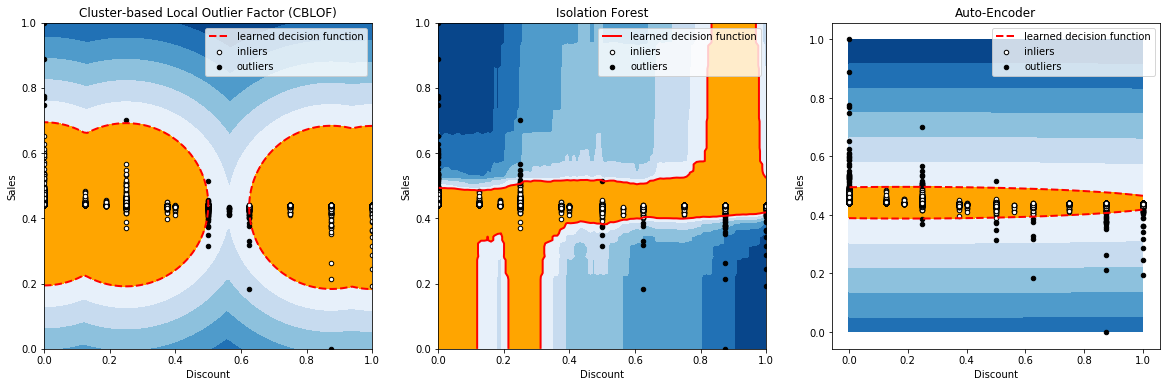

In [ ]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax_objs = [ax[0], ax[1], ax[2]]
models = [cblof_model, if_model, ae_model]
plot_titles = ['Cluster-based Local Outlier Factor (CBLOF)',
               'Isolation Forest',
               'Auto-Encoder']

for ax_obj, model, plot_title in zip(ax_objs, models, plot_titles):
    visualize_anomalies(model=model,
                        xx=xx, yy=yy,
                        data_df=subset_df,
                        ax_obj=ax_obj,
                        subplot_title=plot_title)
plt.axis('tight');
